In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('dataset.xlsx')

# EDA

### Objectif

- Comprendre les données que l'on a sous la main
- Développer une stratégie de modélisation

### Checklist de base

#### Analyse de forme

- Identification de la target : SARS-Cov-2 exam result
- Nb lignes et de colonnes : 5644, 111
- types de variables : 70 quantitatives, 41 qualitatives
- Analyse des valeurs manquantes : Beaucoup de NaN (Plus de 60% des variables ont 90% de Nan). En particulier, 2 groupes 76 % -> Tests, 89% -> tests sanguins

#### Analyse de fond

- Visualisation de la target : 10 % de positif

-**Sens des variables**

- Variables continues : standardisées, asymétrique pour certaines
- age quantile : difficile d'interpréter ce graphique
- analyse catégorielle : variable binaires, forte detection du Rhinovirus

-**Relations variables**

- Il semble que les taux de Monocyte, platlets, et de Leukocyte soit lié à la présence de covid-19
- Visiblement les personnes avec un "age quantile" inferieur à 3 sont moins touchées. À toutefois prendre avec des pincettes vu qu'on a ne sait pas préceisément à quoi correspondes les valeurs associées à cette variable
- Relation autres virus / target : à priori il est rare d'avoir 2 virus en même temps, mais reste à prouver, pas très concluant ...

#### Analyse plus profonde

- Relation sang / sang : Certaines variables sont très corrélées (+ de 0.9)
- Relation age/sang : très faible
- Relation test / test : les influenza rapid test donnent de mauvais résultats, une recherche internet montre qu'ils ne sont pas fiables en plus
- Visiblement il est posible de contracter d'autres virus en plus d'être testé positif au coronavirus
- Relation test sanguin /maladie : taux sanguin entre malade et covid19 sont différents

-**NaN Analyse** : en droppant les tests sanguins 600 non NaN (87 vs 13), les tests 1300 (92 vs. 8), ensemble (90 vs.10)


#### Hypothèses nulles

- LEs individues atteints du covid19 ont un taux de leuko/mono cyte et platelets différents.
    H0 : les taux moyens sont égaux pour une personne atteinte et une personne sainte

## Analyse de forme

In [3]:
data.head(10)

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   
5  75f16746216c4d1                     9               negative   
6  2a2245e360808d7                    13               negative   
7  509197ec73f1400                    16               negative   
8  8bb9d64f0215244                     1               negative   
9  5f1ed301375586c                    17               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   
5                                               0   
6                                               0   
7                                               0   
8                                               0   
9                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       
5                                                  0       
6                                                  0       
7                                                  0       
8                                                  1       
9                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   
5                                                  0             NaN   
6                                                  0             NaN   
7                                                  0             NaN   
8                                                  0       -1.571682   
9                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   ...  \
0         NaN        NaN                    NaN  ...   
1   -0.022340  -0.517413               0.010677  ...   
2         NaN        NaN                    NaN  ...   
3         NaN        NaN                    NaN  ...   
4         NaN        NaN                    NaN  ...   
5         NaN        NaN                    NaN  ...   
6         NaN        NaN                    NaN  ...   
7         NaN        NaN                    NaN  ...   
8   -0.774212   1.429667              -1.672222  ...   
9         NaN        NaN                    NaN  ...   

   Hb saturation (arterial blood gases)  pCO2 (arterial blood gas analysis)  \
0                                   NaN                                 NaN   
1                                   NaN                                 NaN   
2                                   NaN                                 NaN   
3                                   NaN                                 NaN   
4                                   NaN                                 NaN   
5                                   NaN                                 NaN   
6                                   NaN                       

In [4]:
df = data.copy()

In [5]:
df.shape

(5644, 111)

In [6]:
df.dtypes

Patient ID                                                object
Patient age quantile                                       int64
SARS-Cov-2 exam result                                    object
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
Patient addmited to intensive care unit (1=yes, 0=no)      int64
Hematocrit                                               float64
Hemoglobin                                               float64
Platelets                                                float64
Mean platelet volume                                     float64
Red blood Cells                                          float64
Lymphocytes                                              float64
Mean corpuscular hemoglobin concentration (MCHC)         float64
Leukocytes                                               float64
Basophils                                                float64
Mean corpuscular hemoglob

In [7]:
df.dtypes.value_counts()

float64    70
object     37
int64       4
dtype: int64

In [8]:
pd.set_option('display.max_rows', 111)
((df.isna().sum() / df.shape[0]) * 100).sort_values()

Patient ID                                                 0.000000
Patient age quantile                                       0.000000
SARS-Cov-2 exam result                                     0.000000
Patient addmited to regular ward (1=yes, 0=no)             0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)      0.000000
Patient addmited to intensive care unit (1=yes, 0=no)      0.000000
Influenza B                                               76.009922
Respiratory Syncytial Virus                               76.009922
Influenza A                                               76.009922
Rhinovirus/Enterovirus                                    76.045358
Inf A H1N1 2009                                           76.045358
CoronavirusOC43                                           76.045358
Coronavirus229E                                           76.045358
Parainfluenza 4                                           76.045358
Adenovirus                                      

In [9]:
count = 0
for i in range(0, len(df.columns)):
    if df.isna().sum()[i] > df.shape[0]*0.9:
        count += 1
count / df.shape[1] * 100

64.86486486486487

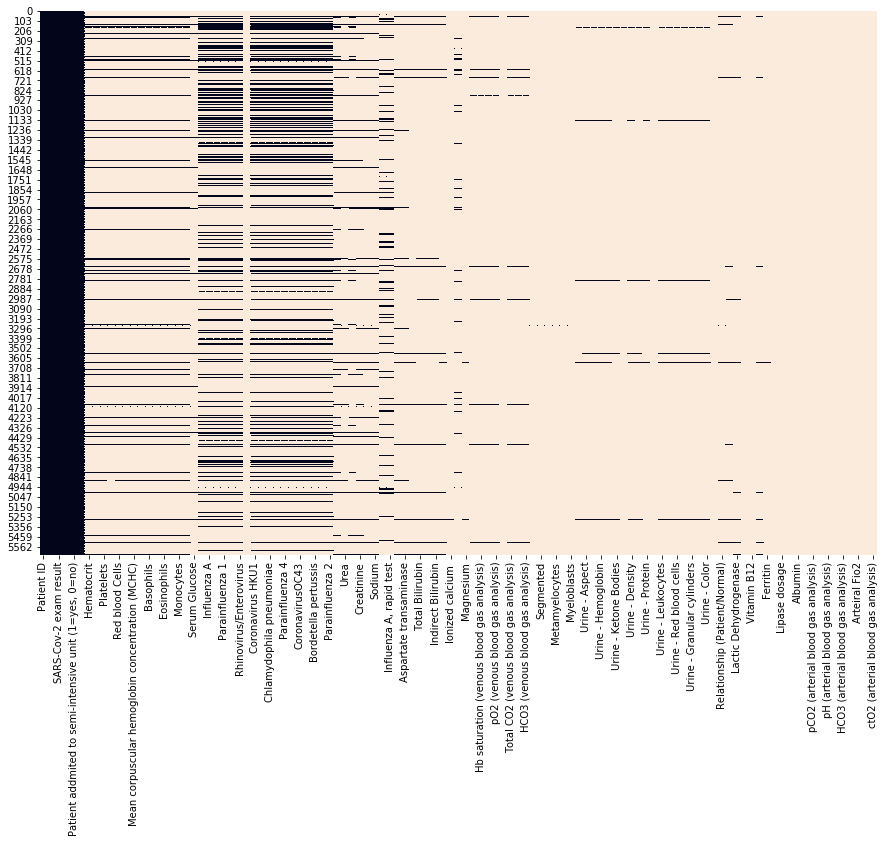

In [10]:
plt.figure(figsize = (15,10))
sns.heatmap(df.isna(), cbar= False)

## Analyse de fond

In [11]:
selection = df.columns[df.isna().sum() / df.shape[0] < 0.9]

In [12]:
df = df[selection]

In [13]:
df

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0     44477f75e8169d2                    13               negative   
1     126e9dd13932f68                    17               negative   
2     a46b4402a0e5696                     8               negative   
3     f7d619a94f97c45                     5               negative   
4     d9e41465789c2b5                    15               negative   
5     75f16746216c4d1                     9               negative   
6     2a2245e360808d7                    13               negative   
7     509197ec73f1400                    16               negative   
8     8bb9d64f0215244                     1               negative   
9     5f1ed301375586c                    17               negative   
10    d720464cc322b6f                     8               negative   
11    02c84e61d5f9e18                     1               negative   
12    b68a6f32fd88a49                     1               negative   
13    0fbafd910aa8078                    13               negative   
14    f9056545d1296ec                    14               negative   
15    6c9d3323975b082                     9               negative   
16    b62e45a8a3f683e                    15               negative   
17    99da3c055438133                    13               negative   
18    d3ea751f3db9de9                    11               negative   
19    315cc65959223e0                     9               negative   
20    fe656baa2bfc5dd                     0               negative   
21    93b8a7ad37b1400                    17               negative   
22    2c2eae16c12a18a                     9               negative   
23    59b54b15e19da77                     9               negative   
24    d153a96599e2d41                    13               negative   
25    6b43d02183a4e72                     3               negative   
26    fe26809ebb6ef44                    11               negative   
27    50abe42feb0b703                    11               negative   
28    fc41531ca4faf1e                    13               negative   
29    891d0f6449ff3d7                    14               negative   
30    ebdd7c67fcb21b4                     9               negative   
31    554ce78d5936fe8                    13               negative   
32    296adf066a9bf03                     8               negative   
33    6da0fb1799dbf57                    17               negative   
34    0b1e43c5e3fb1d1                    17               negative   
35    39bfa1be6de588e                     3               negative   
36    c0aa8a22eaccb63                    14               negative   
37    a1bd3d591a72633                    10               negative   
38    826f654dbf80245                    16               negative   
39    2e1cada13fa6439                     6               negative   
40    a2432a45830c32d                    15               negative   
41    18033e288631304                    12               negative   
42    27b26b840b56278                     6               negative   
43    0f91de4ee066dbb                     3               negative   
44    c6da0f9185a0d3d                     6               negative   
45    62e504c6781b50e                    16               negative   
46    5c39241fdb4d9c7                    13               negative   
47    56112eca73447bf                    19               negative   
48    08bafb971c192a4                    11               negative   
49    adb014b831971bd                    11               negative   
50    11e4956b770f080                    17               negative   
51    7feee6750421bec                     7               negative   
52    805b09474eca023                    11               negative   
53    9abc76405794c6d                     9               negative   
54    e8cf187db036a5d                    17               negative   
...               ...                   ...                    ...   
5589  71f47e536afa016

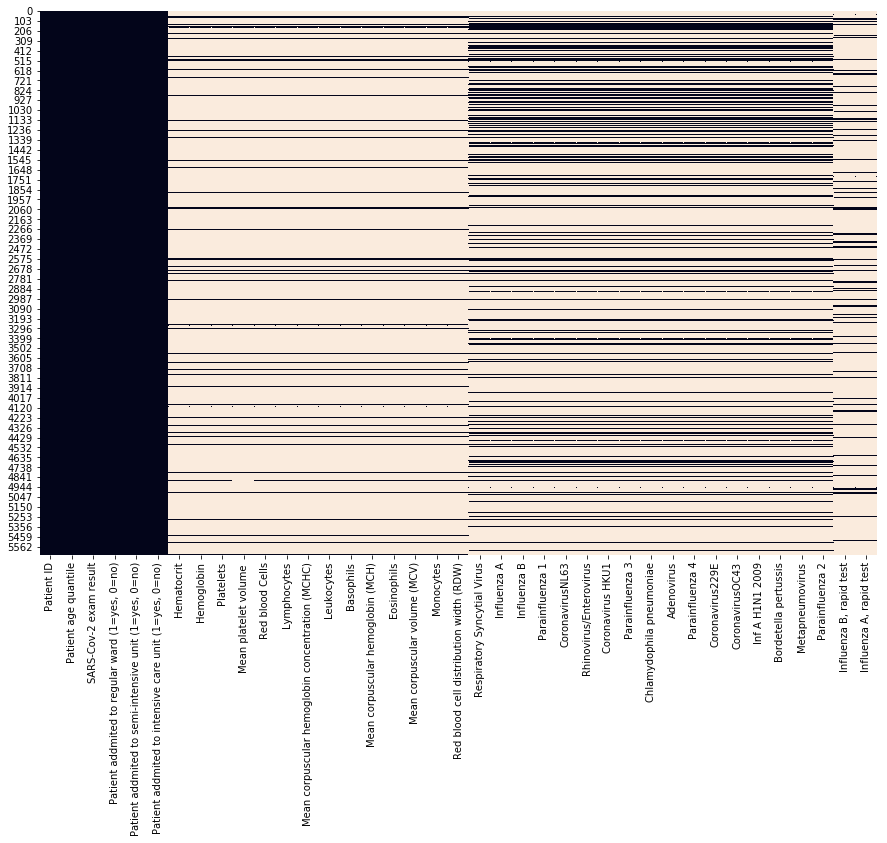

In [14]:
plt.figure(figsize = (15,10))
sns.heatmap(df.isna(), cbar= False)

In [15]:
df = df.drop('Patient ID', axis = 1)

In [16]:
df['SARS-Cov-2 exam result'].value_counts(normalize = True)

negative    0.901134
positive    0.098866
Name: SARS-Cov-2 exam result, dtype: float64

### Histogramme variables continues

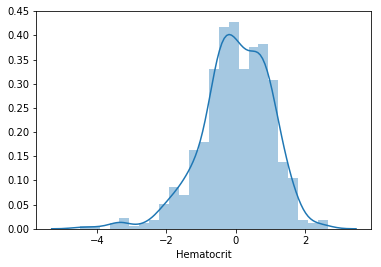

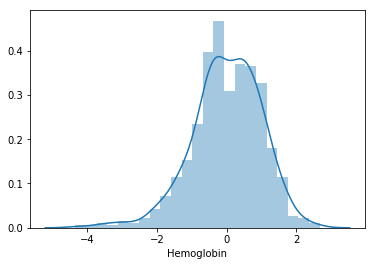

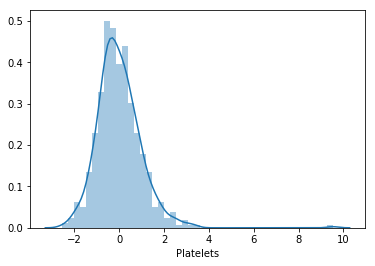

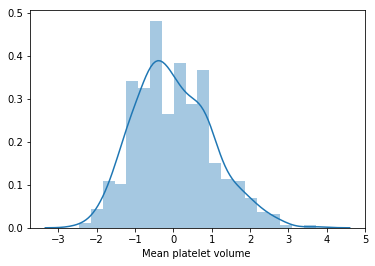

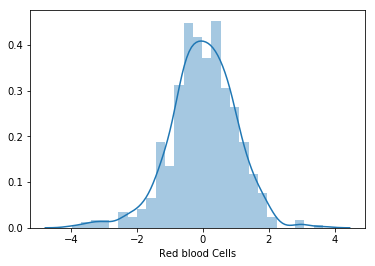

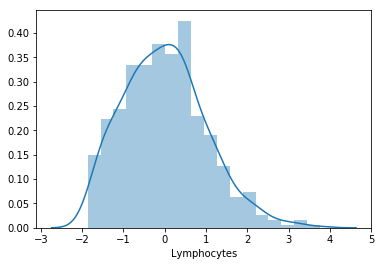

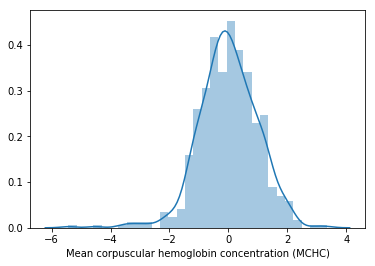

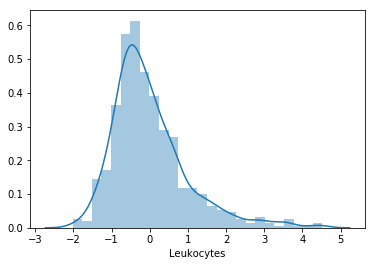

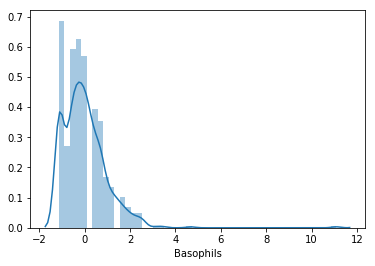

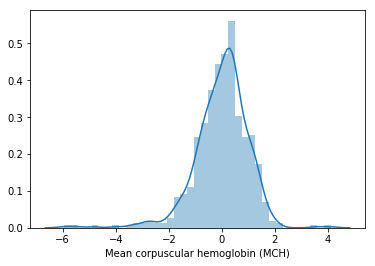

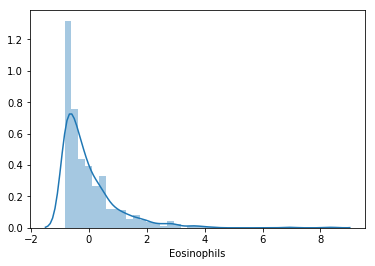

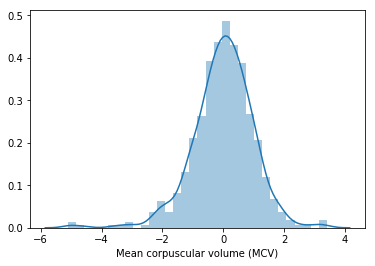

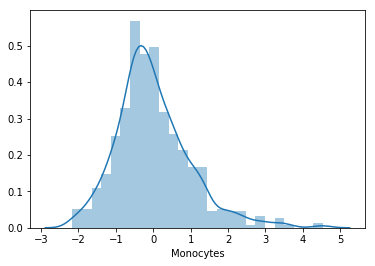

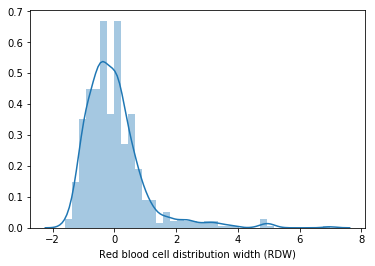

In [17]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

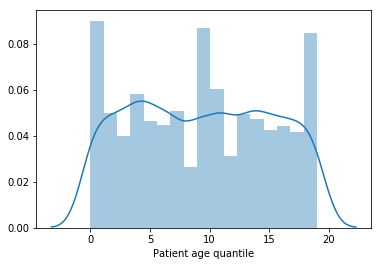

In [18]:
sns.distplot(df['Patient age quantile'])

### Variables catégorielles

In [19]:
for col in df.select_dtypes('O'):
    print(f" {col :-<50} {df[col].unique() }")

 SARS-Cov-2 exam result---------------------------- ['negative' 'positive']
 Respiratory Syncytial Virus----------------------- [nan 'not_detected' 'detected']
 Influenza A--------------------------------------- [nan 'not_detected' 'detected']
 Influenza B--------------------------------------- [nan 'not_detected' 'detected']
 Parainfluenza 1----------------------------------- [nan 'not_detected' 'detected']
 CoronavirusNL63----------------------------------- [nan 'not_detected' 'detected']
 Rhinovirus/Enterovirus---------------------------- [nan 'detected' 'not_detected']
 Coronavirus HKU1---------------------------------- [nan 'not_detected' 'detected']
 Parainfluenza 3----------------------------------- [nan 'not_detected' 'detected']
 Chlamydophila pneumoniae-------------------------- [nan 'not_detected' 'detected']
 Adenovirus---------------------------------------- [nan 'not_detected' 'detected']
 Parainfluenza 4----------------------------------- [nan 'not_detected' 'detected']


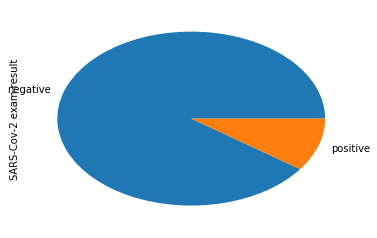

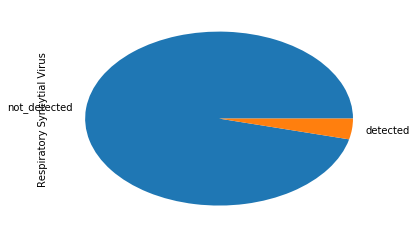

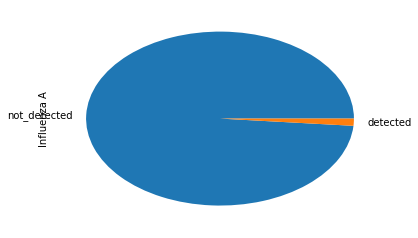

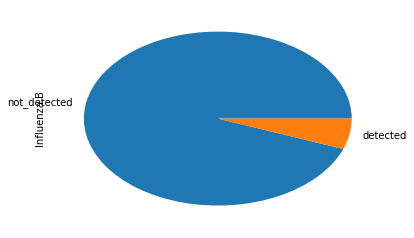

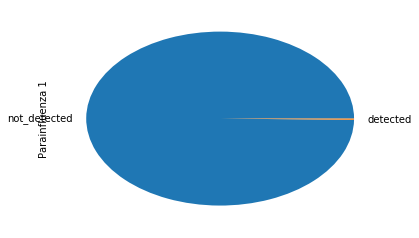

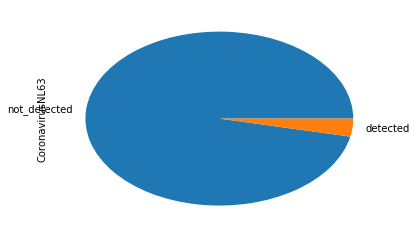

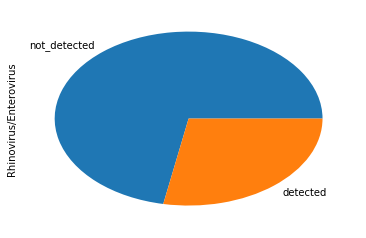

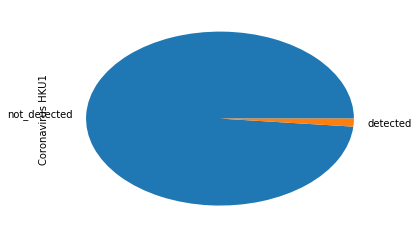

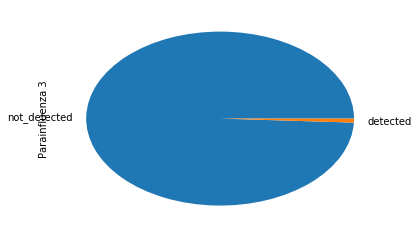

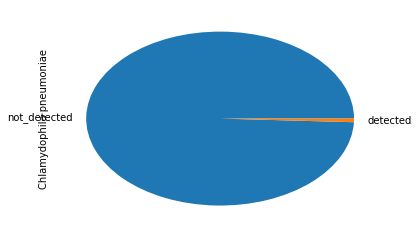

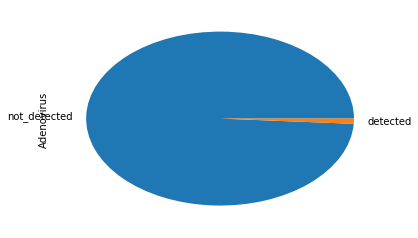

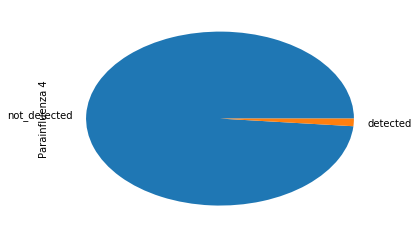

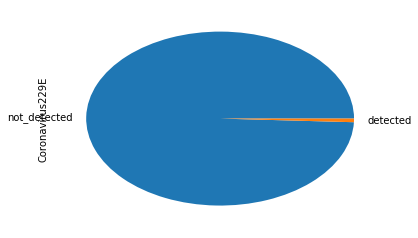

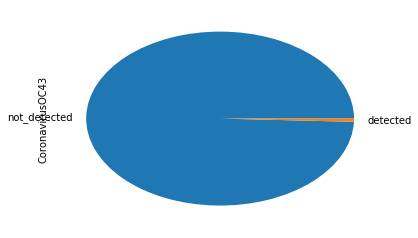

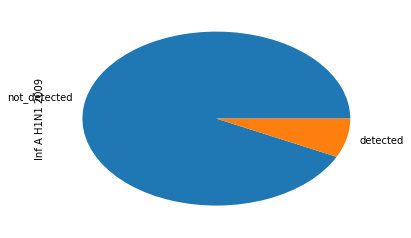

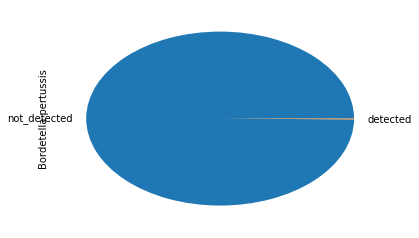

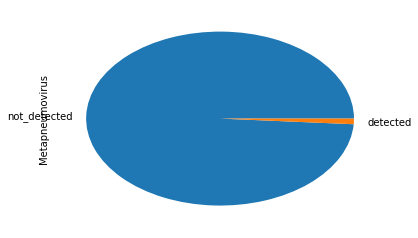

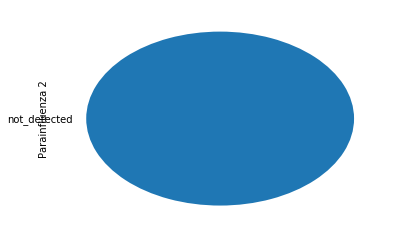

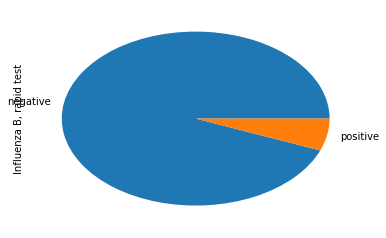

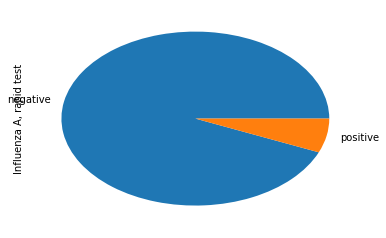

In [20]:
for col in df.select_dtypes('O'):
    plt.figure()
    df[col].value_counts().plot.pie()

### Relation target / variable

In [21]:
positive_df = df[df['SARS-Cov-2 exam result'] == 'positive']
negative_df = df[df['SARS-Cov-2 exam result'] == 'negative']

In [22]:
missing_rate = df.isna().sum() / df.shape[0]

In [23]:
blood_columns = df.columns[(missing_rate > 0.87) & (missing_rate < 0.9)]
test_columns = df.columns[(missing_rate > 0.76) & (missing_rate < 0.87) ]

#### Target vs. Blood variables

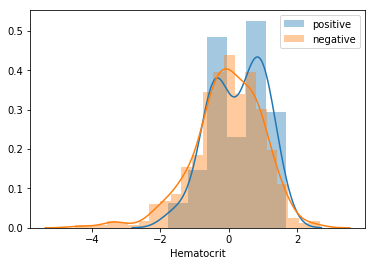

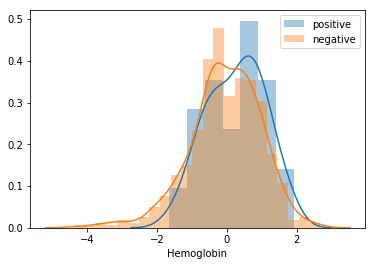

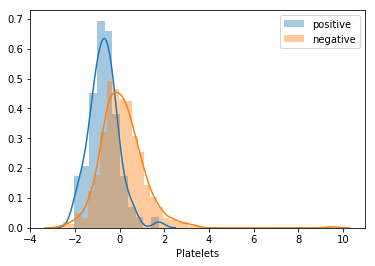

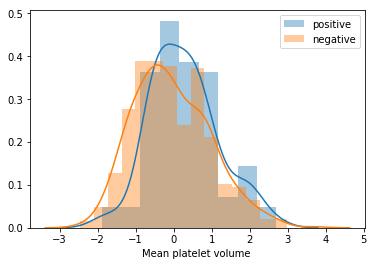

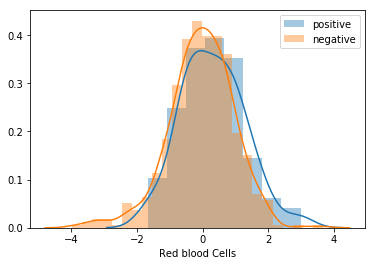

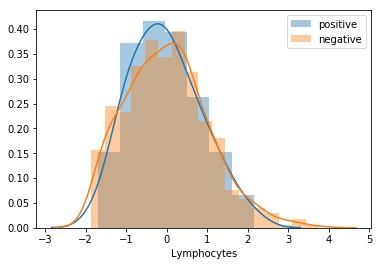

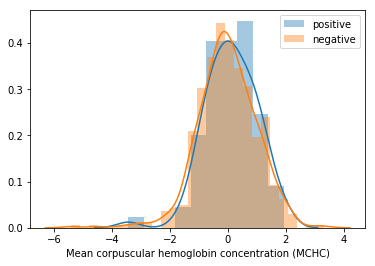

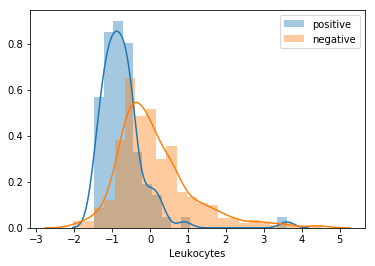

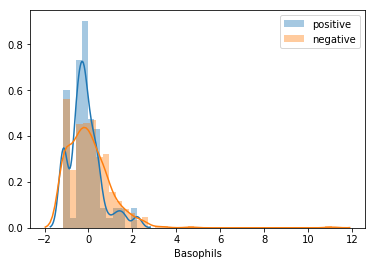

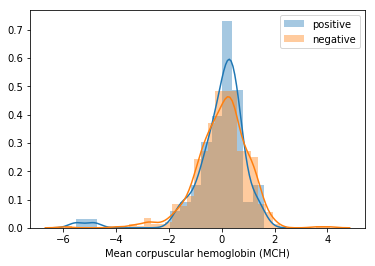

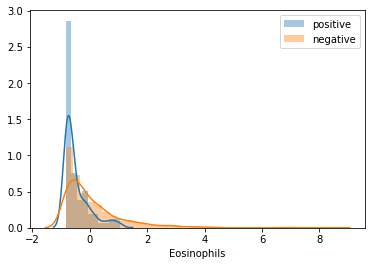

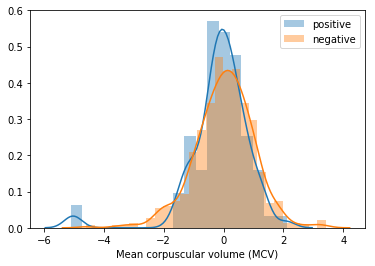

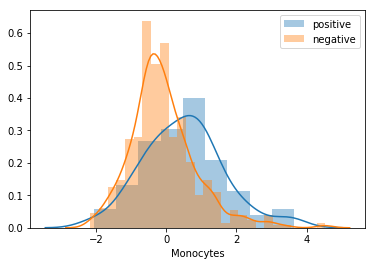

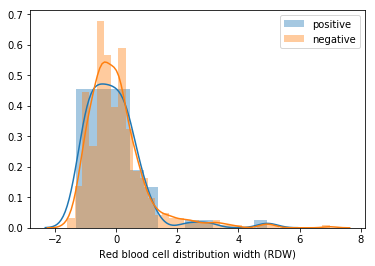

In [24]:
for col in blood_columns:
    plt.figure()
    sns.distplot(positive_df[col], label = 'positive')
    sns.distplot(negative_df[col], label = 'negative')
    plt.legend()

#### Target vs. Age

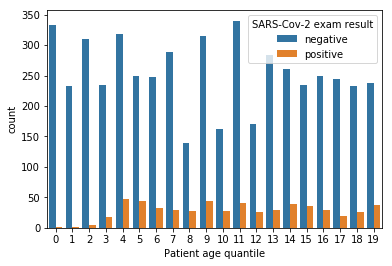

In [25]:
sns.countplot(x = df['Patient age quantile'], hue = df['SARS-Cov-2 exam result'])

In [26]:
df.shape

(5644, 38)

In [27]:
pd.crosstab(df['SARS-Cov-2 exam result'], df['Influenza A'])

Influenza A             detected  not_detected
SARS-Cov-2 exam result                        
negative                      18          1224
positive                       0           112

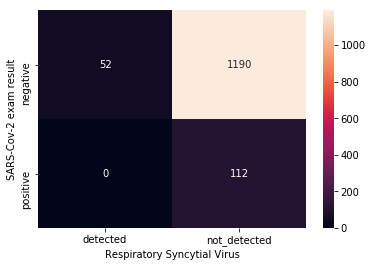

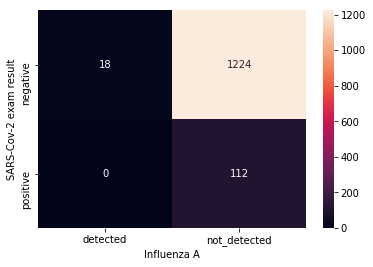

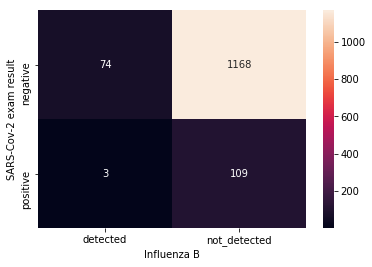

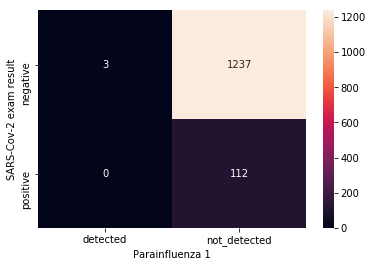

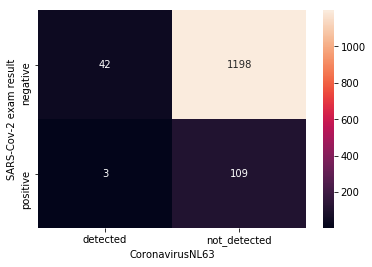

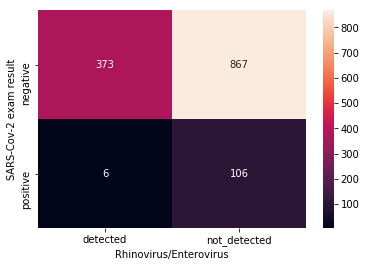

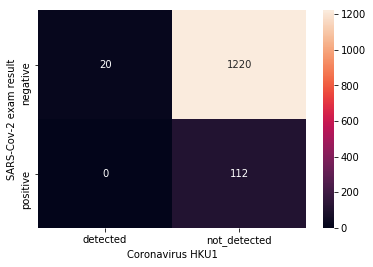

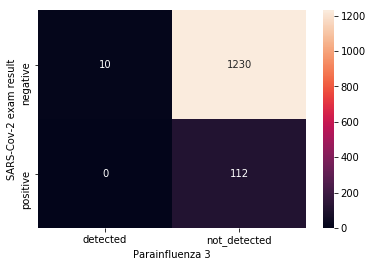

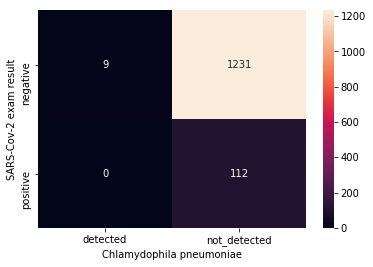

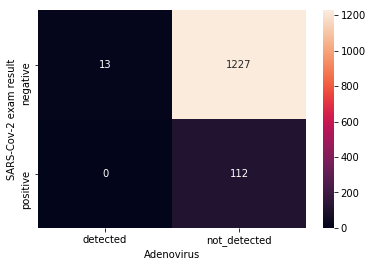

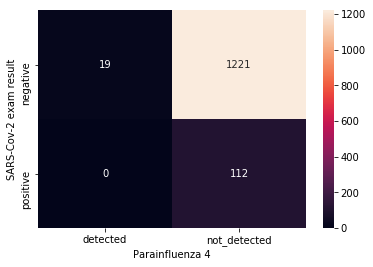

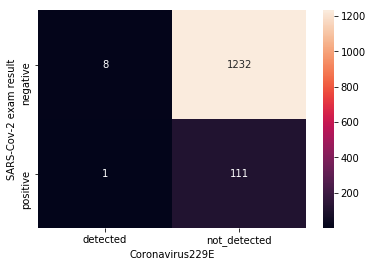

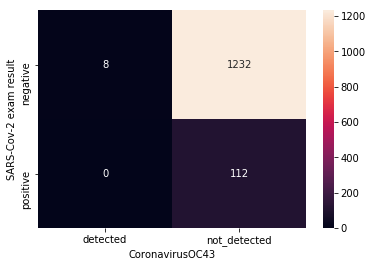

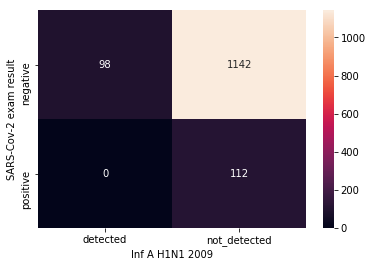

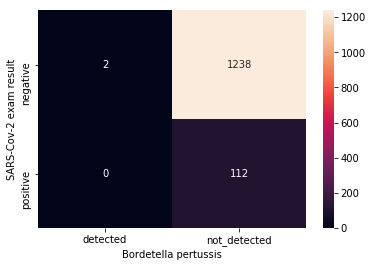

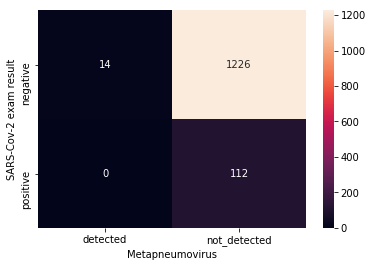

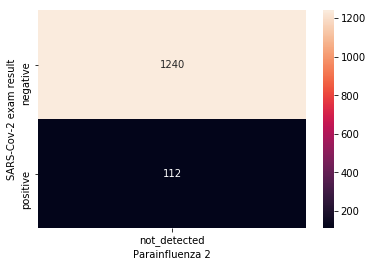

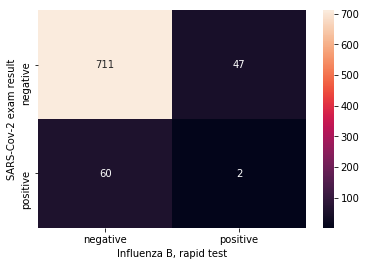

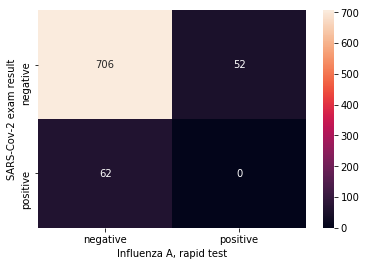

In [28]:
for col in test_columns:
    plt.figure()
    sns.heatmap( pd.crosstab(df['SARS-Cov-2 exam result'], df[col]), annot = True, fmt = 'd')

## Analyse plus profonde

### Relation var/ var

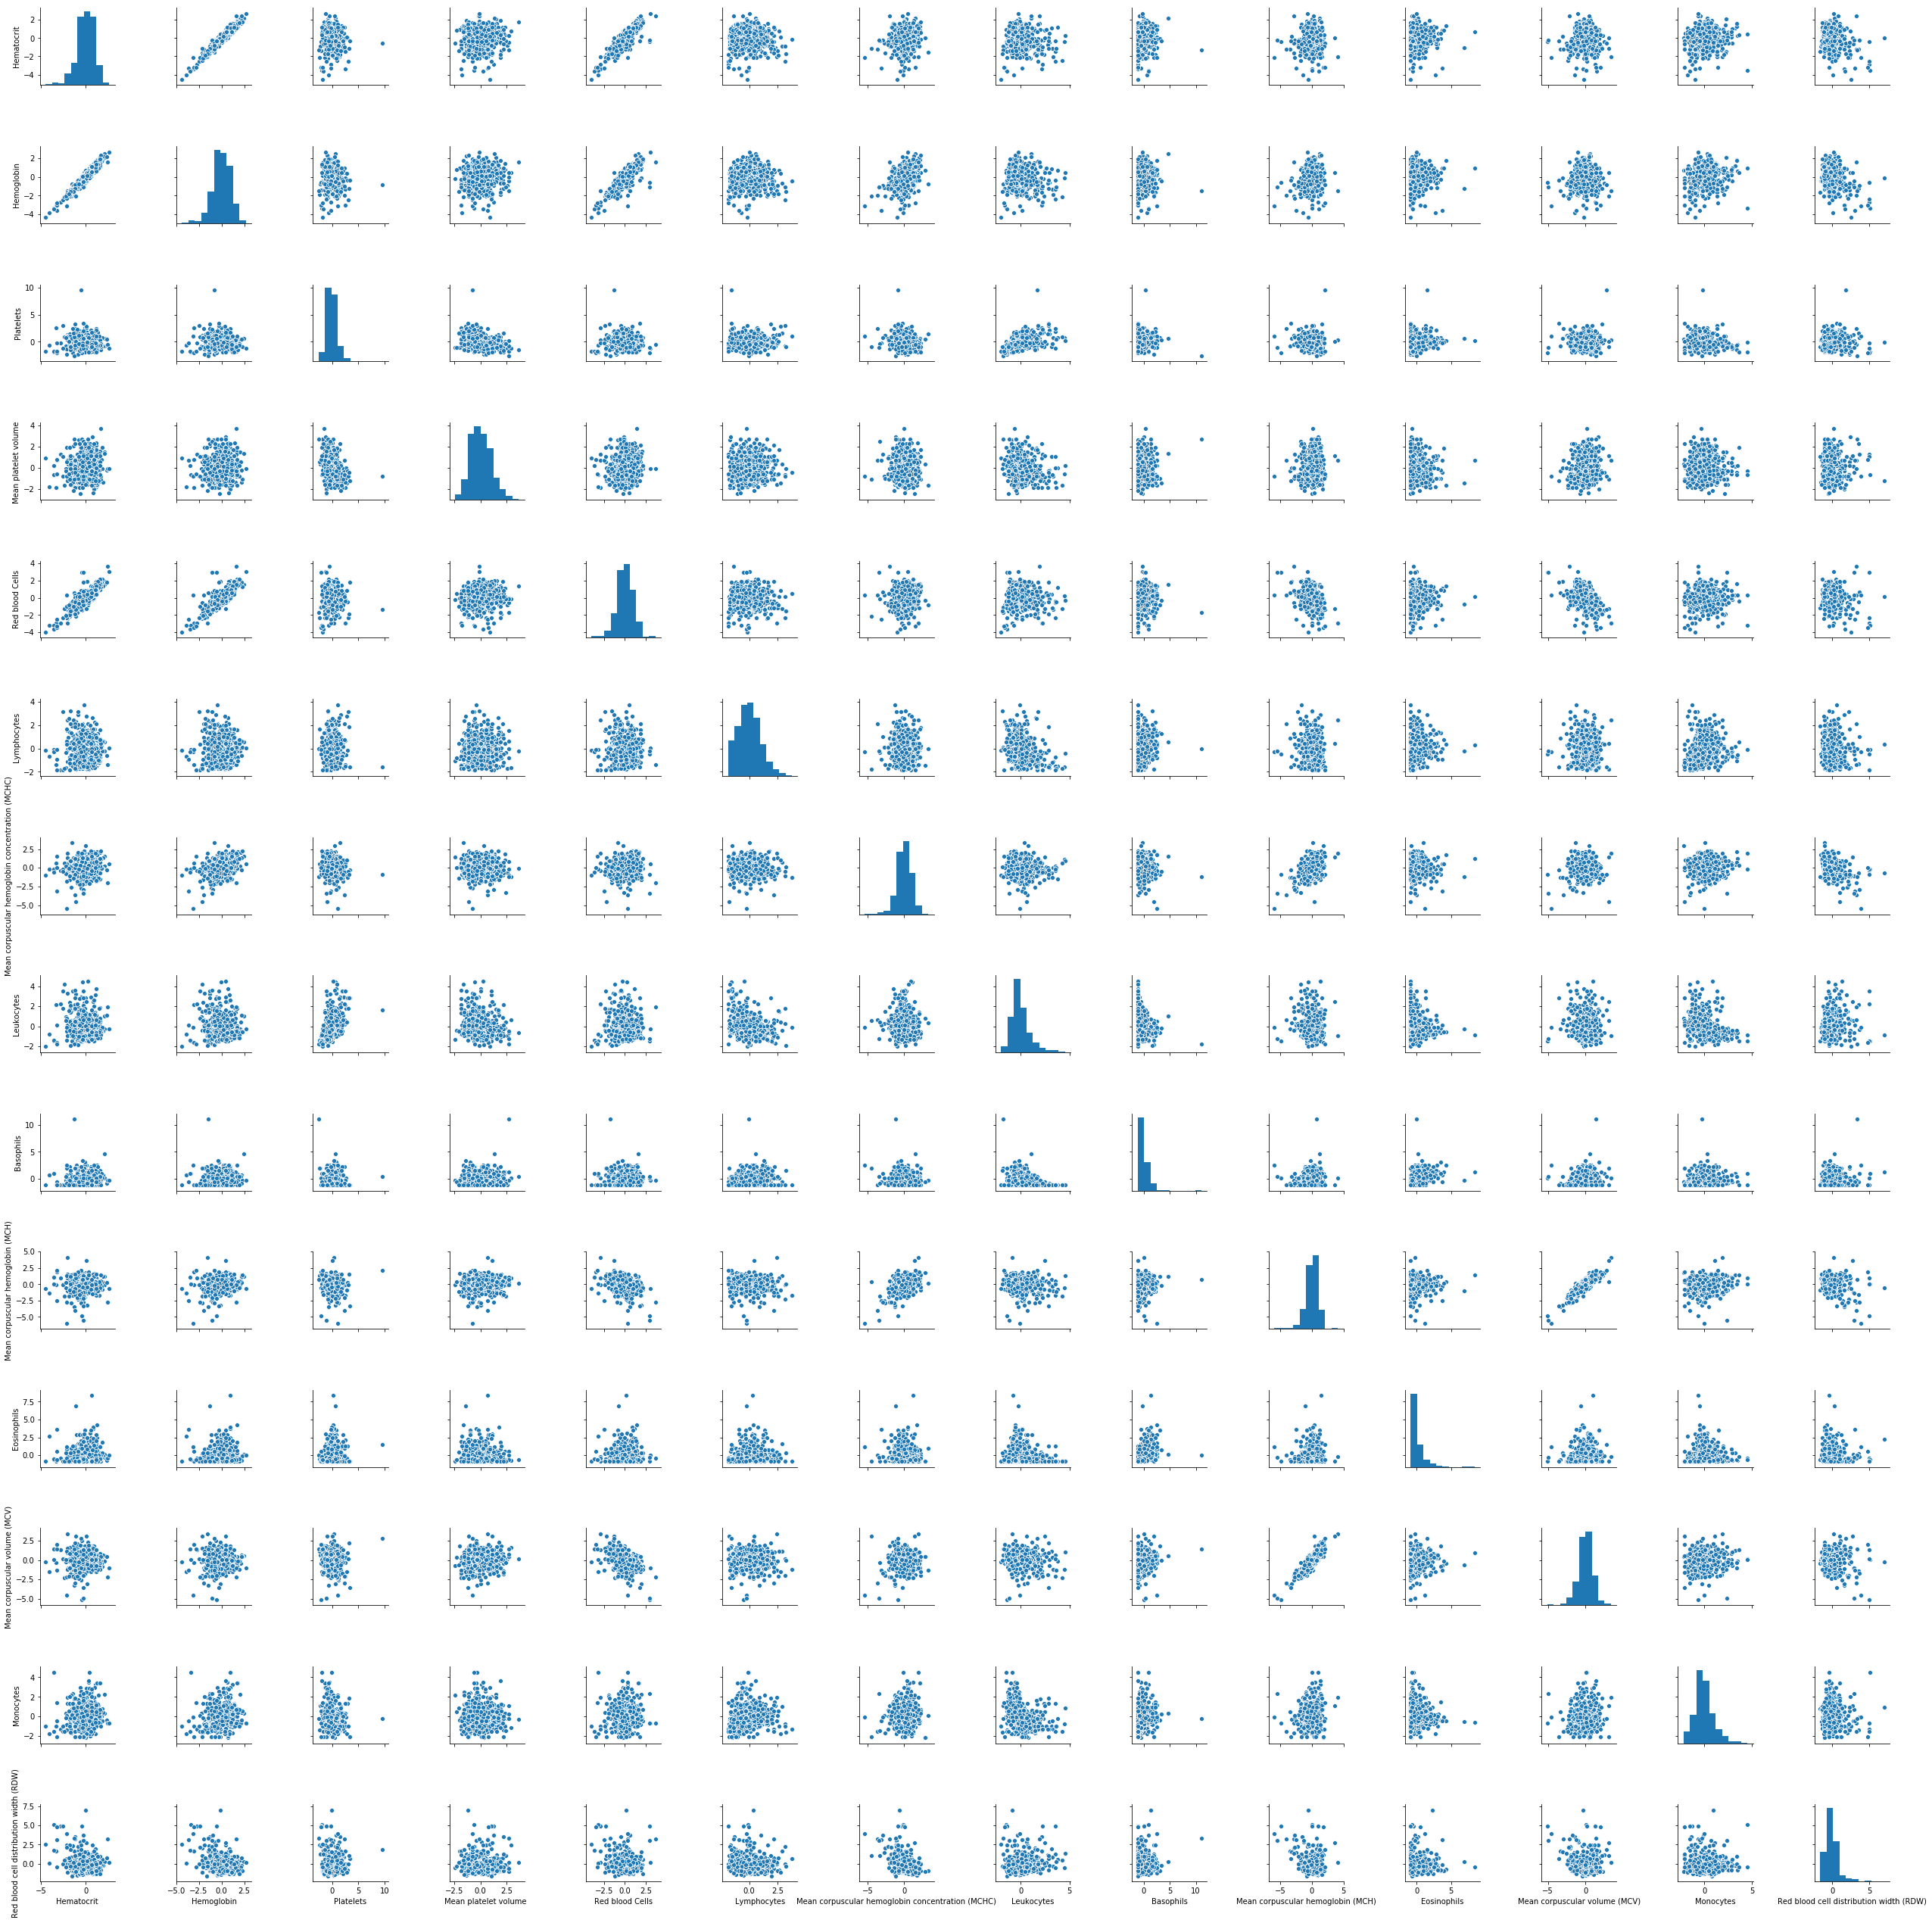

In [29]:
sns.pairplot(df[blood_columns])

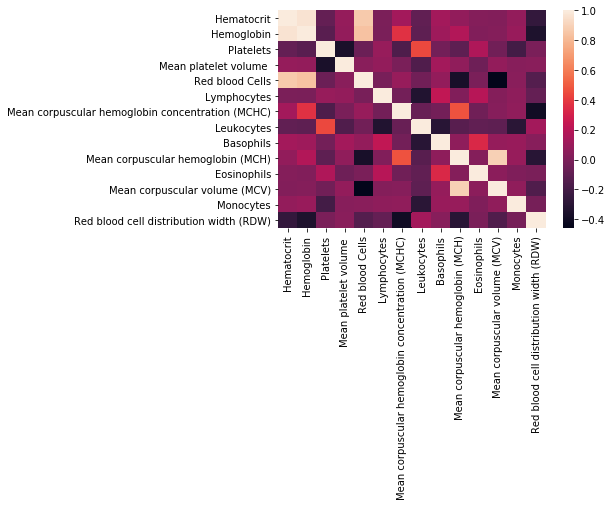

In [30]:
sns.heatmap(df[blood_columns].corr())

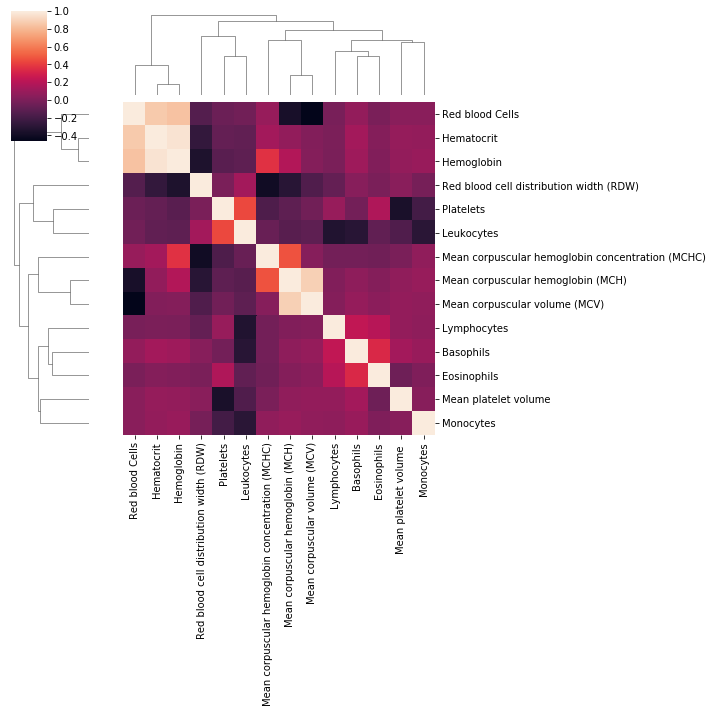

In [31]:
sns.clustermap(df[blood_columns].corr())

In [32]:
df.corr()['Patient age quantile'].sort_values()

Leukocytes                                              -0.166386
Platelets                                               -0.158683
Lymphocytes                                             -0.125935
Mean corpuscular hemoglobin concentration (MCHC)        -0.124671
Red blood Cells                                         -0.037510
Patient addmited to intensive care unit (1=yes, 0=no)   -0.035772
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.015736
Eosinophils                                              0.022085
Patient addmited to regular ward (1=yes, 0=no)           0.046166
Monocytes                                                0.050962
Hemoglobin                                               0.060320
Hematocrit                                               0.096808
Basophils                                                0.107525
Mean platelet volume                                     0.119449
Red blood cell distribution width (RDW)                  0.166429
Mean corpu

In [33]:
pd.crosstab(df['Influenza A'], df['Influenza A, rapid test'])

Influenza A, rapid test  negative  positive
Influenza A                                
detected                        2         4
not_detected                  245        15

In [34]:
pd.crosstab(df['Influenza B'], df['Influenza B, rapid test'])

Influenza B, rapid test  negative  positive
Influenza B                                
detected                       18        11
not_detected                  233         4

In [35]:
malade = np.sum(df[test_columns[: -2]] == 'detected', axis = 1) ## creation variable 'malade'

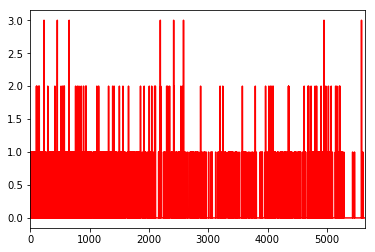

In [36]:
malade.plot(c = 'red') ## test positif a des maladies >=1

In [37]:
df['est malade'] = malade >=1

In [38]:
malade_df = df[df['est malade'] == True]
non_malade_df = df[df['est malade'] == False]

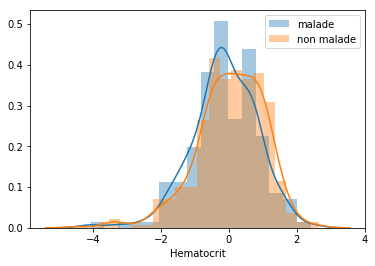

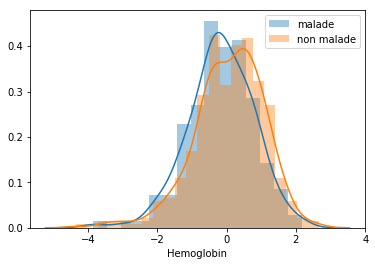

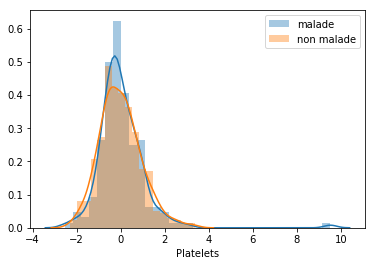

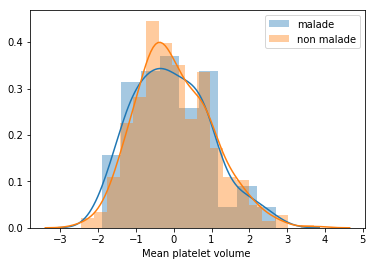

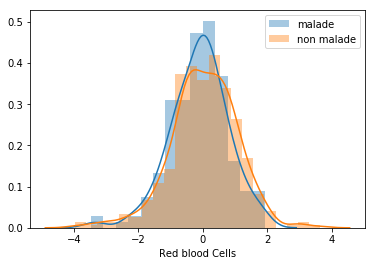

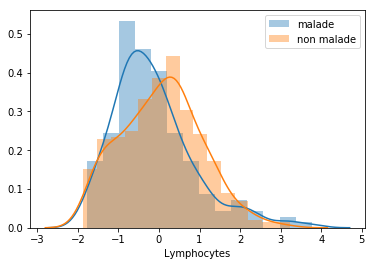

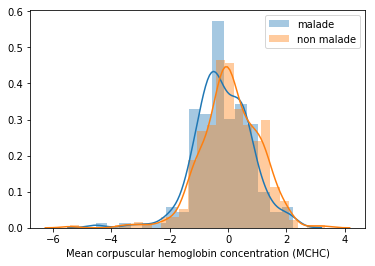

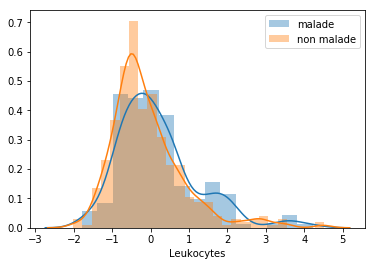

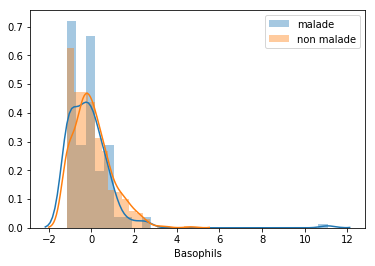

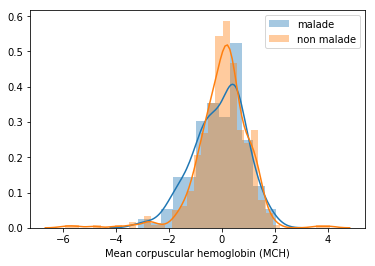

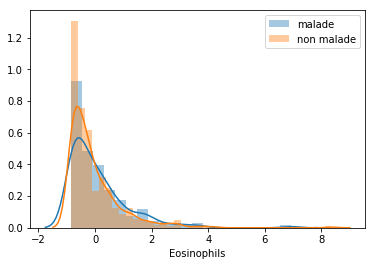

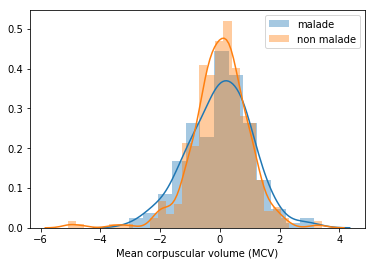

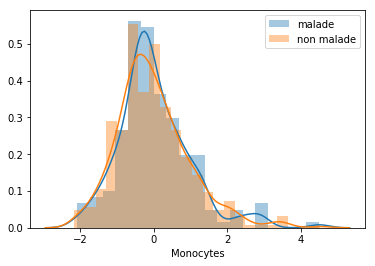

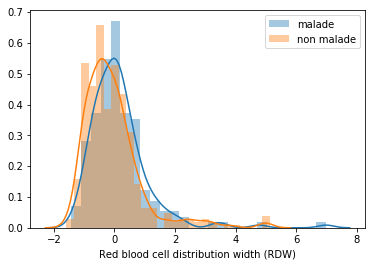

In [39]:
for col in blood_columns:
    plt.figure()
    sns.distplot(malade_df[col], label = 'malade')
    sns.distplot(non_malade_df[col], label = 'non malade')
    plt.legend()

In [40]:
def hospitalisation(df):
    if df['Patient addmited to regular ward (1=yes, 0=no)'] == 1:
        return "surveillance"
    elif df["Patient addmited to semi-intensive unit (1=yes, 0=no)"] == 1:
        return "soins semi-intensif"
    elif df["Patient addmited to intensive care unit (1=yes, 0=no)"] == 1:
        return "soins intensifs"
    else:
        return "inconnu"

In [41]:
df['statut'] = df.apply(hospitalisation, axis = 1)

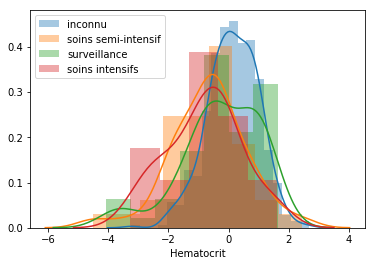

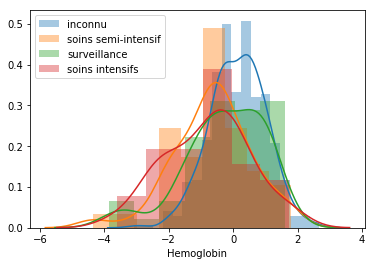

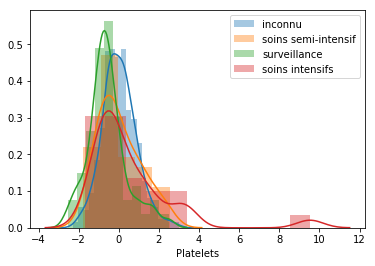

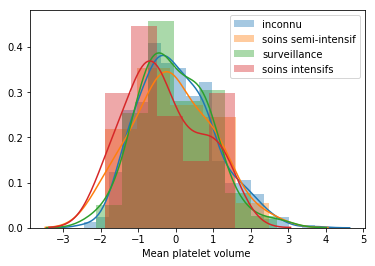

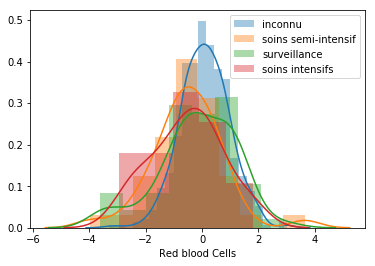

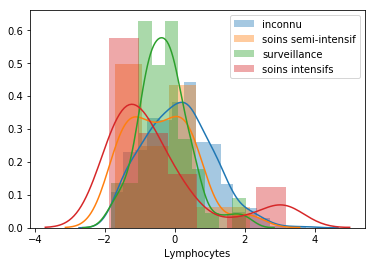

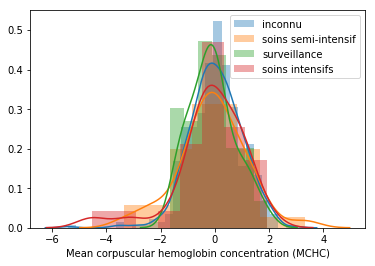

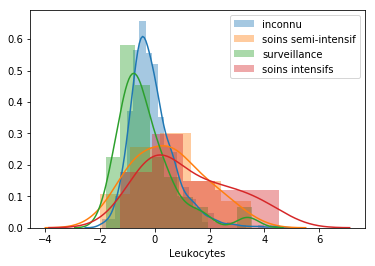

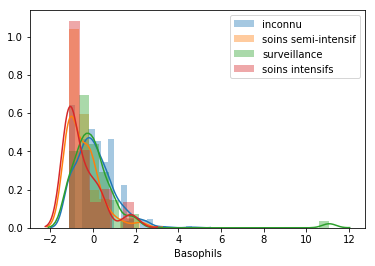

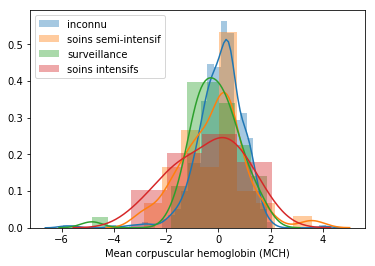

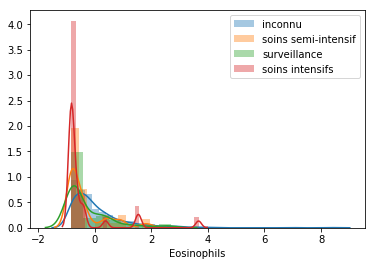

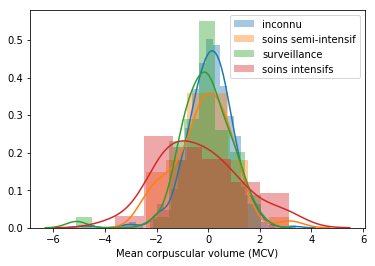

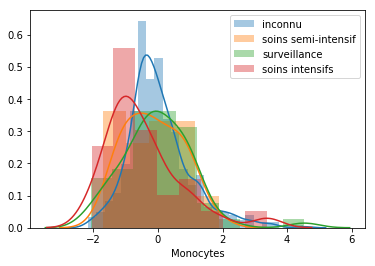

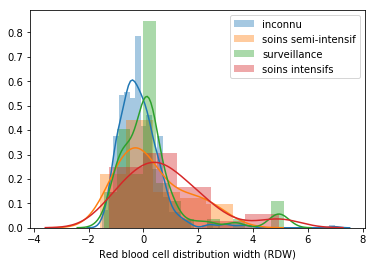

In [42]:
for col in blood_columns:
    plt.figure()
    for cat in df['statut'].unique():
        sns.distplot(df[df['statut'] == cat][col], label = cat)
    plt.legend()

In [43]:
df[df['statut'] == 'inconnu']['Patient age quantile']

0       13
1       17
2        8
3        5
4       15
5        9
6       13
7       16
9       17
10       8
11       1
12       1
13      13
14      14
15       9
16      15
17      13
18      11
19       9
20       0
21      17
22       9
23       9
24      13
25       3
26      11
27      11
28      13
29      14
31      13
32       8
33      17
34      17
35       3
36      14
37      10
38      16
39       6
40      15
41      12
42       6
43       3
44       6
45      16
46      13
47      19
48      11
49      11
50      17
51       7
52      11
53       9
54      17
56       6
57      18
        ..
5589    12
5590    15
5591    12
5592     9
5593     9
5594     9
5595     3
5596    11
5597    14
5598     9
5599    11
5600     9
5601     4
5602    19
5603    11
5604    17
5605     4
5606     8
5607     0
5608     5
5609    15
5610     9
5611    16
5612     7
5613    10
5614    19
5615    15
5616     5
5617    11
5618    17
5619    11
5620    15
5621    14
5622     8
5623     6

In [44]:
df1 = df[test_columns[:-2]]

In [45]:
df1['covid'] = df['SARS-Cov-2 exam result']

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [46]:
df1.dropna()['covid'].value_counts(normalize = True)

negative    0.91716
positive    0.08284
Name: covid, dtype: float64

In [47]:
df2 = df[blood_columns]
df2['covid'] = df['SARS-Cov-2 exam result']

df2.dropna()['covid'].value_counts(normalize = True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


negative    0.864548
positive    0.135452
Name: covid, dtype: float64

### T- Test pour l'hypothèse H0

In [48]:
from scipy.stats import ttest_ind

In [49]:
positive_df.shape

(558, 38)

In [50]:
negative_df.shape

(5086, 38)

In [51]:
neg_balanced = negative_df.sample(positive_df.shape[0])

In [52]:
def t_test(col):
    alpha = 0.2
    stat, p = ttest_ind(neg_balanced[col].dropna(), positive_df[col].dropna())
    
    if p < 0.2:
        return "H0 rejeté"
    else:
        return 0

In [53]:
for col in blood_columns:
    print(f'{col :-<50} {t_test(col) }')

Hematocrit---------------------------------------- H0 rejeté
Hemoglobin---------------------------------------- H0 rejeté
Platelets----------------------------------------- H0 rejeté
Mean platelet volume ----------------------------- 0
Red blood Cells----------------------------------- H0 rejeté
Lymphocytes--------------------------------------- 0
Mean corpuscular hemoglobin concentration (MCHC)-- H0 rejeté
Leukocytes---------------------------------------- H0 rejeté
Basophils----------------------------------------- H0 rejeté
Mean corpuscular hemoglobin (MCH)----------------- 0
Eosinophils--------------------------------------- H0 rejeté
Mean corpuscular volume (MCV)--------------------- H0 rejeté
Monocytes----------------------------------------- H0 rejeté
Red blood cell distribution width (RDW)----------- 0


# Pre-processing

In [54]:
df1 = data.copy()

In [55]:
missing_rate = df1.isna().sum() / df1.shape[0]

In [56]:
blood_columns = list(df1.columns[(missing_rate < 0.9) & (missing_rate > 0.88)])
test_columns = list(df1.columns[(missing_rate < 0.8) & (missing_rate > 0.75)])

In [57]:
key_columns = ['Patient age quantile', 'SARS-Cov-2 exam result']

In [58]:
df1 = df1[key_columns + blood_columns + test_columns]

In [59]:
df1

Patient age quantile SARS-Cov-2 exam result  Hematocrit  Hemoglobin  \
0                       13               negative         NaN         NaN   
1                       17               negative    0.236515   -0.022340   
2                        8               negative         NaN         NaN   
3                        5               negative         NaN         NaN   
4                       15               negative         NaN         NaN   
5                        9               negative         NaN         NaN   
6                       13               negative         NaN         NaN   
7                       16               negative         NaN         NaN   
8                        1               negative   -1.571682   -0.774212   
9                       17               negative         NaN         NaN   
10                       8               negative         NaN         NaN   
11                       1               negative         NaN         NaN   
12                       1               negative         NaN         NaN   
13                      13               negative         NaN         NaN   
14                      14               negative         NaN         NaN   
15                       9               negative   -0.747693   -0.586244   
16                      15               negative         NaN         NaN   
17                      13               negative         NaN         NaN   
18                      11               negative    0.991838    0.792188   
19                       9               negative         NaN         NaN   
20                       0               negative         NaN         NaN   
21                      17               negative         NaN         NaN   
22                       9               negative    0.190738   -0.147652   
23                       9               negative         NaN         NaN   
24                      13               negative         NaN         NaN   
25                       3               negative         NaN         NaN   
26                      11               negative         NaN         NaN   
27                      11               negative         NaN         NaN   
28                      13               negative    1.014726    0.854844   
29                      14               negative    0.740064    0.854844   
30                       9               negative   -0.679027   -0.711556   
31                      13               negative         NaN         NaN   
32                       8               negative    0.236515    0.040316   
33                      17               negative         NaN         NaN   
34                      17               negative    0.808730    1.042812   
35                       3               negative         NaN         NaN   
36                      14               negative   -0.106813   -0.335620   
37                      10               negative         NaN         NaN   
38                      16               negative    1.426721    1.230779   
39                       6               negative         NaN         NaN   
40                      15               negative    0.717175    0.604220   
41                      12               negative         NaN         NaN   
42                       6               negative         NaN         NaN   
43                       3               negative         NaN         NaN   
44                       6               negative         NaN         NaN   
45                      16               negative         NaN         NaN   
46                      13               negative         NaN         NaN   
47                      19               negative         NaN         NaN   
48                      11               negative         NaN         NaN   
49                      11               negative         NaN         NaN   
50                      17               negative    1.014726    0.666876   
51

## Train-Test, Nettoyage, Encodage

In [60]:
from sklearn.model_selection import train_test_split

trainset, testset = train_test_split(df1, test_size = 0.2, random_state = 0)

#### Encodage

In [61]:
code = {'detected' : 1, 'not_detected' : 0, 'positive' : 1, 'negative': 0}

for col in df1.select_dtypes('O').columns:
    df1[col] = df1[col].map(code)

In [62]:
df1.dtypes.value_counts()

float64    31
int64       2
dtype: int64

In [63]:
def encodage(df):
    code = {'detected' : 1, 'not_detected' : 0, 'positive' : 1, 'negative': 0}
    
    for col in df.select_dtypes('O').columns:
        df[col] = df[col].map(code)
    return df

In [64]:
def imputation(df):
    return df.dropna(axis = 0)

In [65]:
def preprocessing(df):
    df = encodage(df)
    df = imputation(df)
    
    X = df.drop('SARS-Cov-2 exam result', axis = 1)
    Y = df['SARS-Cov-2 exam result']
    
    print(Y.value_counts())
    
    return X,Y

In [66]:
X_train, Y_train = preprocessing(trainset)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


0    258
1     38
Name: SARS-Cov-2 exam result, dtype: int64


In [67]:
X_test, Y_test = preprocessing(testset)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


0    54
1    12
Name: SARS-Cov-2 exam result, dtype: int64


### Modelisation

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline

model = DecisionTreeClassifier(random_state= 0)

In [69]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [70]:
def evaluation(model):
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    
    print(confusion_matrix(Y_test, y_pred))
    print(classification_report(Y_test, y_pred))
    
    N, train_score, val_score = learning_curve(model, X_train, Y_train, cv = 4, train_sizes= np.linspace(0.1, 1, 10)
                                              , scoring= 'f1')
    
    plt.figure()
    plt.plot(N, train_score.mean(axis = 1), label = 'train_score')
    plt.plot(N, val_score.mean(axis = 1), label = 'val_score')
    
    plt.legend()

[[52  2]
 [10  2]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.90        54
           1       0.50      0.17      0.25        12

    accuracy                           0.82        66
   macro avg       0.67      0.56      0.57        66
weighted avg       0.78      0.82      0.78        66



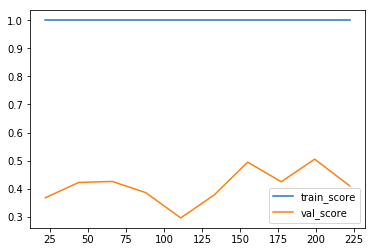

In [71]:
evaluation(model)

Après le premier test, on remarque qu'il y'a un grand écart entre les valeurs du train et ceux du val score.. On remarque que plus les données augmentent mieux est la courbe de validation. Il faudrait penser à fournir plus de données au modele. PAr exemple en modifiant la fonction d'imputaion qui est un dropna, qui enlève bcp de données à notre jeu.

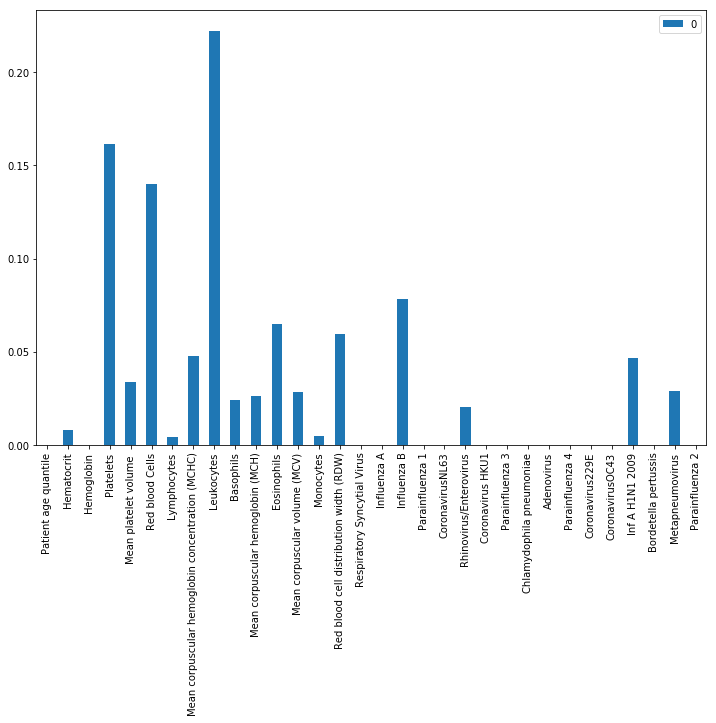

In [72]:
pd.DataFrame(model.feature_importances_, index = X_train.columns).plot.bar(figsize = (12,8))

In [84]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC # pltôt convenient pour des dataet de petite taille, taille intermédiaire
from sklearn.neighbors import KNeighborsClassifier


#Prepro
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.feature_selection import f_classif, SelectKBest

# creation de pipeline preprocessing, puis pipeline pour chaque modèles
# RQ les algos d'arbres ne necessitent pas de normalisation, en revanche les autres si, donc il faut scaler dans la pipe


preprocessing_pipeline = make_pipeline(PolynomialFeatures(2, include_bias = False), SelectKBest(f_classif, k = 10))


RF = make_pipeline(preprocessing_pipeline, RandomForestClassifier(random_state= 0))
ADA = make_pipeline(preprocessing_pipeline, AdaBoostClassifier(random_state= 0))
SVM = make_pipeline(preprocessing_pipeline, StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(preprocessing_pipeline, StandardScaler(), KNeighborsClassifier())

model_dict = {'Random Forest' :RF, 'ADA' : ADA, 'SVM' : SVM, 'KNN' : KNN}

Random Forest


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 18  23  29  31  47  50  55  56  57  61  63  81  86  92  94 111 116 122
 124 140 145 151 153 168 173 179 181 195 200 206 208 221 226 232 234 246
 251 257 259 270 275 281 283 293 298 304 306 315 320 326 328 336 341 347
 349 356 361 367 369 375 380 386 388 393 398 404 406 408 409 410 411 413
 414 415 417 418 419 420 421 422 423 425 426 427 428 429 430 431 432 434
 435 437 438 439 441 442 444 445 446 447 448 449 450 452 454 455 456 457
 458 459 460 461 462 463 464 465 466 467 468 470 471 473 474 475 476 477
 478 479 480 481 483 484 485 487 488 490 491 492 493 495 496 497 498 499
 500 501 502 503 504 506 507 508 509 510 511 512 513 514 515 516 517 518
 519 520 521 522 523 525 526 527 528 529 530 531 533 534 535 536 537 538
 540 541 542 543 544 546 547 548 549 551 552 553 554 555 556 558 559] are constant.
  UserWarning)
/Library/Framew

[[51  3]
 [ 9  3]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89        54
           1       0.50      0.25      0.33        12

    accuracy                           0.82        66
   macro avg       0.68      0.60      0.61        66
weighted avg       0.79      0.82      0.79        66



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 15  16  18  21  22  23  24  25  26  27  28  29  30  31  47  48  50  53
  54  55  56  57  58  59  60  61  62  63  78  79  81  84  85  86  87  88
  89  90  91  92  93  94 108 109 111 114 115 116 117 118 119 120 121 122
 123 124 137 138 140 143 144 145 146 147 148 149 150 151 152 153 165 166
 168 171 172 173 174 175 176 177 178 179 180 181 192 193 195 198 199 200
 201 202 203 204 205 206 207 208 218 219 221 224 225 226 227 228 229 230
 231 232 233 234 243 244 246 249 250 251 252 253 254 255 256 257 258 259
 267 268 270 273 274 275 276 277 278 279 280 281 282 283 290 291 293 296
 297 298 299 300 301 302 303 304 305 306 312 313 315 318 319 320 321 322
 323 324 325 326 327 328 333 334 336 339 340 341 342 343 344 345 346 347
 348 349 353 354 356 359 360 361 362 363 364 365 366 367 368 369 372 373
 375 378 379 380 381 382 383 384 385 386 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 18  23  29  31  47  48  50  55  56  57  61  63  81  86  92  94 111 116
 122 124 140 145 151 153 168 173 179 181 195 200 206 208 221 226 232 234
 246 251 257 259 270 275 281 283 293 298 304 306 315 320 326 328 336 341
 347 349 356 361 367 369 375 380 386 388 393 398 404 406 408 409 410 411
 413 414 415 417 418 419 420 421 422 423 425 426 427 428 429 430 431 432
 434 435 436 437 438 439 441 442 444 445 446 447 448 449 450 451 452 453
 454 455 456 457 458 459 460 461 462 463 464 465 466 467 468 470 471 473
 474 475 476 477 478 479 480 481 483 484 485 487 488 490 491 492 493 495
 496 497 498 499 500 501 502 503 504 506 507 508 509 510 511 512 513 514
 515 516 517 518 519 520 521 522 523 525 526 527 528 529 530 531 533 534
 535 536 537 538 540 541 542 543 544 546 547 548 549 551 552 553 554 555
 556 558 559] are constant.
  UserWarning

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 18  21  22  23  24  25  26  27  29  31  47  50  53  54  55  56  57  58
  59  61  63  81  84  85  86  87  88  89  90  92  94 111 114 115 116 117
 118 119 120 122 124 140 143 144 145 146 147 148 149 151 153 168 171 172
 173 174 175 176 177 179 181 195 198 199 200 201 202 203 204 206 208 221
 224 225 226 227 228 229 230 232 234 246 249 250 251 252 253 254 255 257
 259 270 273 274 275 276 277 278 279 281 283 293 296 297 298 299 300 301
 302 304 306 315 318 319 320 321 322 323 324 326 328 336 339 340 341 342
 343 344 345 347 349 356 359 360 361 362 363 364 365 367 369 375 378 379
 380 381 382 383 384 386 388 393 396 397 398 399 400 401 402 404 406 408
 409 410 411 412 413 414 415 416 417 418 419 420 421 422 423 425 426 427
 428 429 430 431 432 433 434 435 437 438 439 441 442 443 444 445 446 447
 448 449 450 451 452 453 454 455 456 457 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 18  23  24  27  29  31  47  50  55  56  57  59  61  63  81  86  87  90
  92  94 111 116 117 120 122 124 140 145 146 149 151 153 168 173 174 177
 179 181 195 200 201 204 206 208 221 226 227 230 232 234 246 251 252 255
 257 259 270 275 276 279 281 283 293 298 299 302 304 306 315 320 321 324
 326 328 336 341 342 345 347 349 356 361 362 365 367 369 375 380 381 384
 386 388 393 398 399 402 404 406 408 409 410 411 412 413 414 415 416 417
 418 419 420 421 422 423 425 426 427 428 429 430 431 432 434 435 437 438
 439 441 442 444 445 446 447 448 449 450 452 454 455 456 457 458 459 460
 461 462 463 464 465 466 467 468 470 471 473 474 475 476 477 478 479 480
 481 483 484 485 486 487 488 489 490 491 492 493 495 496 497 498 499 500
 501 502 503 504 506 507 508 509 510 511 512 513 514 515 516 517 518 519
 520 521 522 523 524 525 526 527 528 529 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 18  21  22  23  24  25  26  29  31  47  50  53  54  55  56  57  58  61
  63  81  84  85  86  87  88  89  92  94 111 114 115 116 117 118 119 122
 124 140 143 144 145 146 147 148 151 153 168 171 172 173 174 175 176 179
 181 195 198 199 200 201 202 203 206 208 221 224 225 226 227 228 229 232
 234 246 249 250 251 252 253 254 257 259 270 273 274 275 276 277 278 281
 283 293 296 297 298 299 300 301 304 306 315 318 319 320 321 322 323 326
 328 336 339 340 341 342 343 344 347 349 356 359 360 361 362 363 364 367
 369 375 378 379 380 381 382 383 386 388 393 396 397 398 399 400 401 404
 406 408 409 410 411 412 413 414 415 416 417 418 419 420 421 422 423 425
 426 427 428 429 430 431 432 433 434 435 437 438 439 441 442 443 444 445
 446 447 448 449 450 451 452 453 454 455 456 457 458 459 460 461 462 463
 464 465 466 467 468 470 471 472 473 474 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 18  19  21  22  23  24  25  26  27  29  30  31  47  50  51  53  54  55
  56  57  58  59  61  62  63  81  82  84  85  86  87  88  89  90  92  93
  94 111 112 114 115 116 117 118 119 120 122 123 124 140 141 143 144 145
 146 147 148 149 151 152 153 168 169 171 172 173 174 175 176 177 179 180
 181 195 196 198 199 200 201 202 203 204 206 207 208 221 222 224 225 226
 227 228 229 230 232 233 234 246 247 249 250 251 252 253 254 255 257 258
 259 270 271 273 274 275 276 277 278 279 281 282 283 293 294 296 297 298
 299 300 301 302 304 305 306 315 316 318 319 320 321 322 323 324 326 327
 328 336 337 339 340 341 342 343 344 345 347 348 349 356 357 359 360 361
 362 363 364 365 367 368 369 375 376 378 379 380 381 382 383 384 386 387
 388 393 394 396 397 398 399 400 401 402 404 405 406 408 409 410 411 412
 413 414 415 416 417 418 419 420 421 422 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 18  23  25  29  31  47  50  55  56  57  61  63  81  86  88  92  94 111
 116 118 122 124 140 145 147 151 153 168 173 175 179 181 195 200 202 206
 208 221 226 228 232 234 246 251 253 257 259 270 275 277 281 283 293 298
 300 304 306 315 320 322 326 328 336 341 343 347 349 356 361 363 367 369
 375 380 382 386 388 393 398 400 404 406 408 409 410 411 413 414 415 417
 418 419 420 421 422 423 425 426 427 428 429 430 431 432 433 434 435 437
 438 439 441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456
 457 458 459 460 461 462 463 464 465 466 467 468 470 471 472 473 474 475
 476 477 478 479 480 481 483 484 485 487 488 490 491 492 493 495 496 497
 498 499 500 501 502 503 504 506 507 508 509 510 511 512 513 514 515 516
 517 518 519 520 521 522 523 525 526 527 528 529 530 531 532 533 534 535
 536 537 538 540 541 542 543 544 546 547 

ADA
[[48  6]
 [ 8  4]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.87        54
           1       0.40      0.33      0.36        12

    accuracy                           0.79        66
   macro avg       0.63      0.61      0.62        66
weighted avg       0.77      0.79      0.78        66



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 18  23  29  31  47  50  55  56  57  61  63  81  86  92  94 111 116 122
 124 140 145 151 153 168 173 179 181 195 200 206 208 221 226 232 234 246
 251 257 259 270 275 281 283 293 298 304 306 315 320 326 328 336 341 347
 349 356 361 367 369 375 380 386 388 393 398 404 406 408 409 410 411 413
 414 415 417 418 419 420 421 422 423 425 426 427 428 429 430 431 432 434
 435 437 438 439 441 442 444 445 446 447 448 449 450 452 454 455 456 457
 458 459 460 461 462 463 464 465 466 467 468 470 471 473 474 475 476 477
 478 479 480 481 483 484 485 487 488 490 491 492 493 495 496 497 498 499
 500 501 502 503 504 506 507 508 509 510 511 512 513 514 515 516 517 518
 519 520 521 522 523 525 526 527 528 529 530 531 533 534 535 536 537 538
 540 541 542 543 544 546 547 548 549 551 552 553 554 555 556 558 559] are constant.
  UserWarning)
/Library/Framew

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 18  23  29  31  47  48  50  55  56  57  61  63  81  86  92  94 111 116
 122 124 140 145 151 153 168 173 179 181 195 200 206 208 221 226 232 234
 246 251 257 259 270 275 281 283 293 298 304 306 315 320 326 328 336 341
 347 349 356 361 367 369 375 380 386 388 393 398 404 406 408 409 410 411
 413 414 415 417 418 419 420 421 422 423 425 426 427 428 429 430 431 432
 434 435 436 437 438 439 441 442 443 444 445 446 447 448 449 450 451 452
 453 454 455 456 457 458 459 460 461 462 463 464 465 466 467 468 470 471
 472 473 474 475 476 477 478 479 480 481 483 484 485 487 488 490 491 492
 493 495 496 497 498 499 500 501 502 503 504 506 507 508 509 510 511 512
 513 514 515 516 517 518 519 520 521 522 523 525 526 527 528 529 530 531
 533 534 535 536 537 538 540 541 542 543 544 546 547 548 549 551 552 553
 554 555 556 558 559] are constant.
  Use

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 18  21  22  23  24  25  26  27  29  31  47  50  53  54  55  56  57  58
  59  61  63  81  84  85  86  87  88  89  90  92  94 111 114 115 116 117
 118 119 120 122 124 140 143 144 145 146 147 148 149 151 153 168 171 172
 173 174 175 176 177 179 181 195 198 199 200 201 202 203 204 206 208 221
 224 225 226 227 228 229 230 232 234 246 249 250 251 252 253 254 255 257
 259 270 273 274 275 276 277 278 279 281 283 293 296 297 298 299 300 301
 302 304 306 315 318 319 320 321 322 323 324 326 328 336 339 340 341 342
 343 344 345 347 349 356 359 360 361 362 363 364 365 367 369 375 378 379
 380 381 382 383 384 386 388 393 396 397 398 399 400 401 402 404 406 408
 409 410 411 412 413 414 415 416 417 418 419 420 421 422 423 425 426 427
 428 429 430 431 432 433 434 435 437 438 439 441 442 443 444 445 446 447
 448 449 450 451 452 453 454 455 456 457 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 18  23  24  27  29  31  47  50  55  56  57  59  61  63  81  86  87  90
  92  94 111 116 117 120 122 124 140 145 146 149 151 153 168 173 174 177
 179 181 195 200 201 204 206 208 221 226 227 230 232 234 246 251 252 255
 257 259 270 275 276 279 281 283 293 298 299 302 304 306 315 320 321 324
 326 328 336 341 342 345 347 349 356 361 362 365 367 369 375 380 381 384
 386 388 393 398 399 402 404 406 408 409 410 411 412 413 414 415 416 417
 418 419 420 421 422 423 425 426 427 428 429 430 431 432 434 435 437 438
 439 441 442 444 445 446 447 448 449 450 452 454 455 456 457 458 459 460
 461 462 463 464 465 466 467 468 470 471 473 474 475 476 477 478 479 480
 481 483 484 485 486 487 488 489 490 491 492 493 495 496 497 498 499 500
 501 502 503 504 506 507 508 509 510 511 512 513 514 515 516 517 518 519
 520 521 522 523 524 525 526 527 528 529 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 18  21  23  25  29  31  47  50  53  55  56  57  61  63  81  84  86  88
  92  94 111 114 116 118 122 124 140 143 145 147 151 153 168 171 173 175
 179 181 195 198 200 202 206 208 221 224 226 228 232 234 246 249 251 253
 257 259 270 273 275 277 281 283 293 296 298 300 304 306 315 318 320 322
 326 328 336 339 341 343 347 349 356 359 361 363 367 369 375 378 380 382
 386 388 393 396 398 400 404 406 408 409 410 411 413 414 415 417 418 419
 420 421 422 423 425 426 427 428 429 430 431 432 433 434 435 437 438 439
 441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456 457 458
 459 460 461 462 463 464 465 466 467 468 470 471 472 473 474 475 476 477
 478 479 480 481 483 484 485 487 488 490 491 492 493 494 495 496 497 498
 499 500 501 502 503 504 506 507 508 509 510 511 512 513 514 515 516 517
 518 519 520 521 522 523 525 526 527 528 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 18  21  22  23  24  25  26  27  29  31  47  50  53  54  55  56  57  58
  59  61  63  81  84  85  86  87  88  89  90  92  94 111 114 115 116 117
 118 119 120 122 124 140 143 144 145 146 147 148 149 151 153 168 171 172
 173 174 175 176 177 179 181 195 198 199 200 201 202 203 204 206 208 221
 224 225 226 227 228 229 230 232 234 246 249 250 251 252 253 254 255 257
 259 270 273 274 275 276 277 278 279 281 283 293 296 297 298 299 300 301
 302 304 306 315 318 319 320 321 322 323 324 326 328 336 339 340 341 342
 343 344 345 347 349 356 359 360 361 362 363 364 365 367 369 375 378 379
 380 381 382 383 384 386 388 393 396 397 398 399 400 401 402 404 406 408
 409 410 411 412 413 414 415 416 417 418 419 420 421 422 423 425 426 427
 428 429 430 431 432 433 434 435 437 438 439 441 442 443 444 445 446 447
 448 449 450 451 452 453 454 455 456 457 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 18  23  29  31  47  50  55  56  57  61  63  81  86  92  94 111 116 122
 124 140 145 151 153 168 173 179 181 195 200 206 208 221 226 232 234 246
 251 257 259 270 275 281 283 293 298 304 306 315 320 326 328 336 341 347
 349 356 361 367 369 375 380 386 388 393 398 404 406 408 409 410 411 413
 414 415 417 418 419 420 421 422 423 425 426 427 428 429 430 431 432 434
 435 437 438 439 441 442 443 444 445 446 447 448 449 450 451 452 453 454
 455 456 457 458 459 460 461 462 463 464 465 466 467 468 470 471 472 473
 474 475 476 477 478 479 480 481 483 484 485 487 488 490 491 492 493 495
 496 497 498 499 500 501 502 503 504 506 507 508 509 510 511 512 513 514
 515 516 517 518 519 520 521 522 523 525 526 527 528 529 530 531 533 534
 535 536 537 538 540 541 542 543 544 546 547 548 549 551 552 553 554 555
 556 558 559] are constant.
  UserWarning

SVM
[[51  3]
 [ 8  4]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        54
           1       0.57      0.33      0.42        12

    accuracy                           0.83        66
   macro avg       0.72      0.64      0.66        66
weighted avg       0.81      0.83      0.82        66



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 18  23  29  31  47  50  55  56  57  61  63  81  86  92  94 111 116 122
 124 140 145 151 153 168 173 179 181 195 200 206 208 221 226 232 234 246
 251 257 259 270 275 281 283 293 298 304 306 315 320 326 328 336 341 347
 349 356 361 367 369 375 380 386 388 393 398 404 406 408 409 410 411 413
 414 415 417 418 419 420 421 422 423 425 426 427 428 429 430 431 432 434
 435 437 438 439 441 442 444 445 446 447 448 449 450 452 454 455 456 457
 458 459 460 461 462 463 464 465 466 467 468 470 471 473 474 475 476 477
 478 479 480 481 483 484 485 487 488 490 491 492 493 495 496 497 498 499
 500 501 502 503 504 506 507 508 509 510 511 512 513 514 515 516 517 518
 519 520 521 522 523 525 526 527 528 529 530 531 533 534 535 536 537 538
 540 541 542 543 544 546 547 548 549 551 552 553 554 555 556 558 559] are constant.
  UserWarning)
/Library/Framew

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 18  23  29  31  47  48  50  55  56  57  61  63  81  86  92  94 111 116
 122 124 140 145 151 153 168 173 179 181 195 200 206 208 221 226 232 234
 246 251 257 259 270 275 281 283 293 298 304 306 315 320 326 328 336 341
 347 349 356 361 367 369 375 380 386 388 393 398 404 406 408 409 410 411
 413 414 415 417 418 419 420 421 422 423 425 426 427 428 429 430 431 432
 434 435 436 437 438 439 441 442 444 445 446 447 448 449 450 451 452 453
 454 455 456 457 458 459 460 461 462 463 464 465 466 467 468 470 471 473
 474 475 476 477 478 479 480 481 483 484 485 487 488 490 491 492 493 495
 496 497 498 499 500 501 502 503 504 506 507 508 509 510 511 512 513 514
 515 516 517 518 519 520 521 522 523 525 526 527 528 529 530 531 533 534
 535 536 537 538 540 541 542 543 544 546 547 548 549 551 552 553 554 555
 556 558 559] are constant.
  UserWarning

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 18  23  24  26  27  29  31  47  50  55  56  57  58  59  61  63  81  86
  87  89  90  92  94 111 116 117 119 120 122 124 140 145 146 148 149 151
 153 168 173 174 176 177 179 181 195 200 201 203 204 206 208 221 226 227
 229 230 232 234 246 251 252 254 255 257 259 270 275 276 278 279 281 283
 293 298 299 301 302 304 306 315 320 321 323 324 326 328 336 341 342 344
 345 347 349 356 361 362 364 365 367 369 375 380 381 383 384 386 388 393
 398 399 401 402 404 406 408 409 410 411 412 413 414 415 416 417 418 419
 420 421 422 423 425 426 427 428 429 430 431 432 434 435 437 438 439 441
 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456 457 458 459
 460 461 462 463 464 465 466 467 468 470 471 472 473 474 475 476 477 478
 479 480 481 483 484 485 486 487 488 489 490 491 492 493 495 496 497 498
 499 500 501 502 503 504 506 507 508 509 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 18  21  22  23  24  25  26  29  31  47  50  53  54  55  56  57  58  61
  63  81  84  85  86  87  88  89  92  94 111 114 115 116 117 118 119 122
 124 140 143 144 145 146 147 148 151 153 168 171 172 173 174 175 176 179
 181 195 198 199 200 201 202 203 206 208 221 224 225 226 227 228 229 232
 234 246 249 250 251 252 253 254 257 259 270 273 274 275 276 277 278 281
 283 293 296 297 298 299 300 301 304 306 315 318 319 320 321 322 323 326
 328 336 339 340 341 342 343 344 347 349 356 359 360 361 362 363 364 367
 369 375 378 379 380 381 382 383 386 388 393 396 397 398 399 400 401 404
 406 408 409 410 411 412 413 414 415 416 417 418 419 420 421 422 423 425
 426 427 428 429 430 431 432 433 434 435 437 438 439 441 442 443 444 445
 446 447 448 449 450 451 452 453 454 455 456 457 458 459 460 461 462 463
 464 465 466 467 468 470 471 472 473 474 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 18  19  21  22  23  24  25  26  27  29  30  31  47  50  51  53  54  55
  56  57  58  59  61  62  63  81  82  84  85  86  87  88  89  90  92  93
  94 111 112 114 115 116 117 118 119 120 122 123 124 140 141 143 144 145
 146 147 148 149 151 152 153 168 169 171 172 173 174 175 176 177 179 180
 181 195 196 198 199 200 201 202 203 204 206 207 208 221 222 224 225 226
 227 228 229 230 232 233 234 246 247 249 250 251 252 253 254 255 257 258
 259 270 271 273 274 275 276 277 278 279 281 282 283 293 294 296 297 298
 299 300 301 302 304 305 306 315 316 318 319 320 321 322 323 324 326 327
 328 336 337 339 340 341 342 343 344 345 347 348 349 356 357 359 360 361
 362 363 364 365 367 368 369 375 376 378 379 380 381 382 383 384 386 387
 388 393 394 396 397 398 399 400 401 402 404 405 406 408 409 410 411 412
 413 414 415 416 417 418 419 420 421 422 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 18  23  29  31  47  50  55  56  57  61  63  81  86  92  94 111 116 122
 124 140 145 151 153 168 173 179 181 195 200 206 208 221 226 232 234 246
 251 257 259 270 275 281 283 293 298 304 306 315 320 326 328 336 341 347
 349 356 361 367 369 375 380 386 388 393 398 404 406 408 409 410 411 413
 414 415 417 418 419 420 421 422 423 425 426 427 428 429 430 431 432 434
 435 437 438 439 441 442 443 444 445 446 447 448 449 450 451 452 453 454
 455 456 457 458 459 460 461 462 463 464 465 466 467 468 470 471 472 473
 474 475 476 477 478 479 480 481 483 484 485 487 488 490 491 492 493 495
 496 497 498 499 500 501 502 503 504 506 507 508 509 510 511 512 513 514
 515 516 517 518 519 520 521 522 523 525 526 527 528 529 530 531 533 534
 535 536 537 538 540 541 542 543 544 546 547 548 549 551 552 553 554 555
 556 558 559] are constant.
  UserWarning

KNN
[[49  5]
 [ 7  5]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89        54
           1       0.50      0.42      0.45        12

    accuracy                           0.82        66
   macro avg       0.69      0.66      0.67        66
weighted avg       0.81      0.82      0.81        66



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 16  18  23  25  29  31  47  48  50  55  56  57  61  63  79  81  86  88
  92  94 109 111 116 118 122 124 138 140 145 147 151 153 166 168 173 175
 179 181 193 195 200 202 206 208 219 221 226 228 232 234 244 246 251 253
 257 259 268 270 275 277 281 283 291 293 298 300 304 306 313 315 320 322
 326 328 334 336 341 343 347 349 354 356 361 363 367 369 373 375 380 382
 386 388 391 393 398 400 404 406 408 409 410 411 413 414 415 417 418 419
 420 421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437
 438 439 441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456
 457 458 459 460 461 462 463 464 465 466 467 468 470 471 472 473 474 475
 476 477 478 479 480 481 483 484 485 487 488 490 491 492 493 495 496 497
 498 499 500 501 502 503 504 506 507 508 509 510 511 512 513 514 515 516
 517 518 519 520 521 522 523 525 526 527 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 18  23  24  26  27  29  31  47  50  55  56  57  58  59  61  63  81  86
  87  89  90  92  94 111 116 117 119 120 122 124 140 145 146 148 149 151
 153 168 173 174 176 177 179 181 195 200 201 203 204 206 208 221 226 227
 229 230 232 234 246 251 252 254 255 257 259 270 275 276 278 279 281 283
 293 298 299 301 302 304 306 315 320 321 323 324 326 328 336 341 342 344
 345 347 349 356 361 362 364 365 367 369 375 380 381 383 384 386 388 393
 398 399 401 402 404 406 408 409 410 411 412 413 414 415 416 417 418 419
 420 421 422 423 425 426 427 428 429 430 431 432 434 435 437 438 439 441
 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456 457 458 459
 460 461 462 463 464 465 466 467 468 470 471 472 473 474 475 476 477 478
 479 480 481 483 484 485 486 487 488 489 490 491 492 493 495 496 497 498
 499 500 501 502 503 504 506 507 508 509 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 18  23  25  29  31  47  50  55  56  57  61  63  81  86  88  92  94 111
 116 118 122 124 140 145 147 151 153 168 173 175 179 181 195 200 202 206
 208 221 226 228 232 234 246 251 253 257 259 270 275 277 281 283 293 298
 300 304 306 315 320 322 326 328 336 341 343 347 349 356 361 363 367 369
 375 380 382 386 388 393 398 400 404 406 408 409 410 411 413 414 415 417
 418 419 420 421 422 423 425 426 427 428 429 430 431 432 433 434 435 437
 438 439 441 442 444 445 446 447 448 449 450 451 452 453 454 455 456 457
 458 459 460 461 462 463 464 465 466 467 468 470 471 473 474 475 476 477
 478 479 480 481 483 484 485 487 488 490 491 492 493 495 496 497 498 499
 500 501 502 503 504 506 507 508 509 510 511 512 513 514 515 516 517 518
 519 520 521 522 523 525 526 527 528 529 530 531 532 533 534 535 536 537
 538 540 541 542 543 544 546 547 548 549 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 18  21  22  23  24  25  26  27  29  31  47  50  53  54  55  56  57  58
  59  61  63  81  84  85  86  87  88  89  90  92  94 111 114 115 116 117
 118 119 120 122 124 140 143 144 145 146 147 148 149 151 153 168 171 172
 173 174 175 176 177 179 181 195 198 199 200 201 202 203 204 206 208 221
 224 225 226 227 228 229 230 232 234 246 249 250 251 252 253 254 255 257
 259 270 273 274 275 276 277 278 279 281 283 293 296 297 298 299 300 301
 302 304 306 315 318 319 320 321 322 323 324 326 328 336 339 340 341 342
 343 344 345 347 349 356 359 360 361 362 363 364 365 367 369 375 378 379
 380 381 382 383 384 386 388 393 396 397 398 399 400 401 402 404 406 408
 409 410 411 412 413 414 415 416 417 418 419 420 421 422 423 425 426 427
 428 429 430 431 432 433 434 435 437 438 439 441 442 443 444 445 446 447
 448 449 450 451 452 453 454 455 456 457 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 18  23  29  31  47  50  55  56  57  61  63  81  86  92  94 111 116 122
 124 140 145 151 153 168 173 179 181 195 200 206 208 221 226 232 234 246
 251 257 259 270 275 281 283 293 298 304 306 315 320 326 328 336 341 347
 349 356 361 367 369 375 380 386 388 393 398 404 406 408 409 410 411 413
 414 415 417 418 419 420 421 422 423 425 426 427 428 429 430 431 432 434
 435 437 438 439 441 442 443 444 445 446 447 448 449 450 451 452 453 454
 455 456 457 458 459 460 461 462 463 464 465 466 467 468 470 471 472 473
 474 475 476 477 478 479 480 481 483 484 485 487 488 490 491 492 493 495
 496 497 498 499 500 501 502 503 504 506 507 508 509 510 511 512 513 514
 515 516 517 518 519 520 521 522 523 525 526 527 528 529 530 531 533 534
 535 536 537 538 540 541 542 543 544 546 547 548 549 551 552 553 554 555
 556 558 559] are constant.
  UserWarning

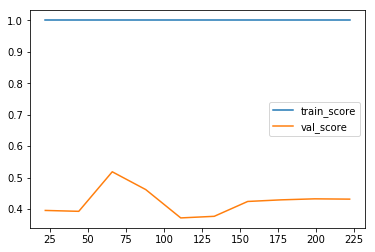

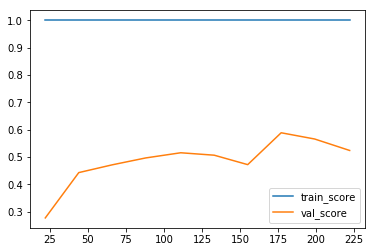

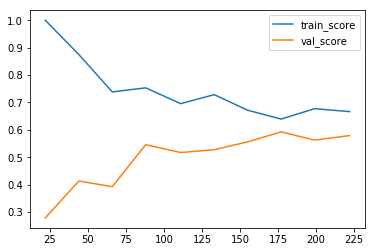

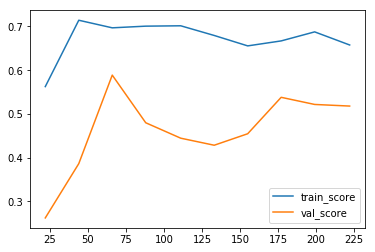

In [85]:
for key, model in model_dict.items():
    print(key)
    evaluation(model)

In [86]:
## D'apres les courbes obtenu le SVM est prometteur, on devrait peut être se focaliser dessus

## Optimisation

In [91]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [88]:
SVM

Pipeline(memory=None,
         steps=[('pipeline',
                 Pipeline(memory=None,
                          steps=[('polynomialfeatures',
                                  PolynomialFeatures(degree=2,
                                                     include_bias=False,
                                                     interaction_only=False,
                                                     order='C')),
                                 ('selectkbest',
                                  SelectKBest(k=10,
                                              score_func=<function f_classif at 0x1343377b8>))],
                          verbose=False)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='r

In [98]:
# On a testé une premiere fois avec GridSearchCV, maintenant on essaye avec RandomizedSearchCV, car trop de temps GridSearch

#hyper_params_SVM= {'svc__gamma' : [1e-3, 1e-4], 'svc__C' : [1, 10, 100, 1000]}


hyper_params_SVM= {'svc__gamma' : [1e-3, 1e-4], 'svc__C' : [1, 10, 100, 1000], 
                   'pipeline__polynomialfeatures__degree': [2,3,4], 
                  'pipeline__selectkbest__k' : range(35,45) }

#grid = GridSearchCV(SVM, hyper_params_SVM, scoring = 'recall', cv = 4)

# test pljsieurs valeurs de selectkbest, on réduit l'interballe

grid = RandomizedSearchCV(SVM, hyper_params_SVM, scoring= 'recall', cv = 4, n_iter = 30)
grid.fit(X_train, Y_train)
print(grid.best_params_)
y_pred = grid.predict(X_test)

print(classification_report(Y_test, y_pred))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  18   23   29 ... 6541 6542 6543] are constant.
  UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  18   23   24 ... 6541 6542 6543] are constant.
  UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarnin

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  18   23   24 ... 6541 6542 6543] are constant.
  UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  18   23   25 ... 6541 6542 6543] are constant.
  UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarnin

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 18  23  29  31  47  50  55  56  57  61  63  81  86  92  94 111 116 122
 124 140 145 151 153 168 173 179 181 195 200 206 208 221 226 232 234 246
 251 257 259 270 275 281 283 293 298 304 306 315 320 326 328 336 341 347
 349 356 361 367 369 375 380 386 388 393 398 404 406 408 409 410 411 413
 414 415 417 418 419 420 421 422 423 425 426 427 428 429 430 431 432 434
 435 437 438 439 441 442 443 444 445 446 447 448 449 450 451 452 453 454
 455 456 457 458 459 460 461 462 463 464 465 466 467 468 470 471 472 473
 474 475 476 477 478 479 480 481 483 484 485 487 488 490 491 492 493 495
 496 497 498 499 500 501 502 503 504 506 507 508 509 510 511 512 513 514
 515 516 517 518 519 520 521 522 523 525 526 527 528 529 530 531 533 534
 535 536 537 538 540 541 542 543 544 546 547 548 549 551 552 553 554 555
 556 558 559] are constant.
  UserWarning

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   18    23    24 ... 58901 58902 58903] are constant.
  UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   18    23    25 ... 58901 58902 58903] are constant.
  UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:114

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  18   23   29 ... 6541 6542 6543] are constant.
  UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  18   23   24 ... 6541 6542 6543] are constant.
  UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarnin

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   18    23    29 ... 58901 58902 58903] are constant.
  UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   18    23    24 ... 58901 58902 58903] are constant.
  UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:114

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   18    23    29 ... 58901 58902 58903] are constant.
  UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   18    23    24 ... 58901 58902 58903] are constant.
  UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:114

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   18    23    29 ... 58901 58902 58903] are constant.
  UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   18    23    24 ... 58901 58902 58903] are constant.
  UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:114

{'svc__gamma': 0.001, 'svc__C': 1000, 'pipeline__selectkbest__k': 44, 'pipeline__polynomialfeatures__degree': 2}
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        54
           1       0.57      0.33      0.42        12

    accuracy                           0.83        66
   macro avg       0.72      0.64      0.66        66
weighted avg       0.81      0.83      0.82        66



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 18  23  29  31  47  50  55  56  57  61  63  81  86  92  94 111 116 122
 124 140 145 151 153 168 173 179 181 195 200 206 208 221 226 232 234 246
 251 257 259 270 275 281 283 293 298 304 306 315 320 326 328 336 341 347
 349 356 361 367 369 375 380 386 388 393 398 404 406 408 409 410 411 413
 414 415 417 418 419 420 421 422 423 425 426 427 428 429 430 431 432 434
 435 437 438 439 441 442 444 445 446 447 448 449 450 452 454 455 456 457
 458 459 460 461 462 463 464 465 466 467 468 470 471 473 474 475 476 477
 478 479 480 481 483 484 485 487 488 490 491 492 493 495 496 497 498 499
 500 501 502 503 504 506 507 508 509 510 511 512 513 514 515 516 517 518
 519 520 521 522 523 525 526 527 528 529 530 531 533 534 535 536 537 538
 540 541 542 543 544 546 547 548 549 551 552 553 554 555 556 558 559] are constant.
  UserWarning)
/Library/Framew

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 18  23  29  31  47  50  55  56  57  61  63  81  86  92  94 111 116 122
 124 140 145 151 153 168 173 179 181 195 200 206 208 221 226 232 234 246
 251 257 259 270 275 281 283 293 298 304 306 315 320 326 328 336 341 347
 349 356 361 367 369 375 380 386 388 393 398 404 406 408 409 410 411 413
 414 415 417 418 419 420 421 422 423 425 426 427 428 429 430 431 432 434
 435 437 438 439 441 442 444 445 446 447 448 449 450 452 454 455 456 457
 458 459 460 461 462 463 464 465 466 467 468 470 471 473 474 475 476 477
 478 479 480 481 483 484 485 487 488 490 491 492 493 495 496 497 498 499
 500 501 502 503 504 506 507 508 509 510 511 512 513 514 515 516 517 518
 519 520 521 522 523 525 526 527 528 529 530 531 533 534 535 536 537 538
 540 541 542 543 544 546 547 548 549 551 552 553 554 555 556 558 559] are constant.
  UserWarning)
/Library/Framew

[[51  3]
 [ 7  5]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        54
           1       0.62      0.42      0.50        12

    accuracy                           0.85        66
   macro avg       0.75      0.68      0.71        66
weighted avg       0.83      0.85      0.84        66



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 18  23  29  31  47  48  50  55  56  57  61  63  81  86  92  94 111 116
 122 124 140 145 151 153 168 173 179 181 195 200 206 208 221 226 232 234
 246 251 257 259 270 275 281 283 293 298 304 306 315 320 326 328 336 341
 347 349 356 361 367 369 375 380 386 388 393 398 404 406 408 409 410 411
 413 414 415 417 418 419 420 421 422 423 425 426 427 428 429 430 431 432
 434 435 436 437 438 439 441 442 444 445 446 447 448 449 450 452 453 454
 455 456 457 458 459 460 461 462 463 464 465 466 467 468 470 471 473 474
 475 476 477 478 479 480 481 483 484 485 487 488 490 491 492 493 495 496
 497 498 499 500 501 502 503 504 506 507 508 509 510 511 512 513 514 515
 516 517 518 519 520 521 522 523 525 526 527 528 529 530 531 533 534 535
 536 537 538 540 541 542 543 544 546 547 548 549 551 552 553 554 555 556
 558 559] are constant.
  UserWarning)
/L

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 18  23  24  27  29  31  47  50  55  56  57  59  61  63  81  86  87  90
  92  94 111 116 117 120 122 124 140 145 146 149 151 153 168 173 174 177
 179 181 195 200 201 204 206 208 221 226 227 230 232 234 246 251 252 255
 257 259 270 275 276 279 281 283 293 298 299 302 304 306 315 320 321 324
 326 328 336 341 342 345 347 349 356 361 362 365 367 369 375 380 381 384
 386 388 393 398 399 402 404 406 408 409 410 411 412 413 414 415 416 417
 418 419 420 421 422 423 425 426 427 428 429 430 431 432 434 435 437 438
 439 441 442 444 445 446 447 448 449 450 451 452 453 454 455 456 457 458
 459 460 461 462 463 464 465 466 467 468 470 471 473 474 475 476 477 478
 479 480 481 483 484 485 486 487 488 489 490 491 492 493 495 496 497 498
 499 500 501 502 503 504 506 507 508 509 510 511 512 513 514 515 516 517
 518 519 520 521 522 523 524 525 526 527 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 18  21  23  25  29  31  47  50  53  55  56  57  61  63  81  84  86  88
  92  94 111 114 116 118 122 124 140 143 145 147 151 153 168 171 173 175
 179 181 195 198 200 202 206 208 221 224 226 228 232 234 246 249 251 253
 257 259 270 273 275 277 281 283 293 296 298 300 304 306 315 318 320 322
 326 328 336 339 341 343 347 349 356 359 361 363 367 369 375 378 380 382
 386 388 393 396 398 400 404 406 408 409 410 411 413 414 415 417 418 419
 420 421 422 423 425 426 427 428 429 430 431 432 433 434 435 437 438 439
 441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456 457 458
 459 460 461 462 463 464 465 466 467 468 470 471 472 473 474 475 476 477
 478 479 480 481 483 484 485 487 488 490 491 492 493 494 495 496 497 498
 499 500 501 502 503 504 506 507 508 509 510 511 512 513 514 515 516 517
 518 519 520 521 522 523 525 526 527 528 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 18  21  22  23  24  25  26  27  29  31  47  50  53  54  55  56  57  58
  59  61  63  81  84  85  86  87  88  89  90  92  94 111 114 115 116 117
 118 119 120 122 124 140 143 144 145 146 147 148 149 151 153 168 171 172
 173 174 175 176 177 179 181 195 198 199 200 201 202 203 204 206 208 221
 224 225 226 227 228 229 230 232 234 246 249 250 251 252 253 254 255 257
 259 270 273 274 275 276 277 278 279 281 283 293 296 297 298 299 300 301
 302 304 306 315 318 319 320 321 322 323 324 326 328 336 339 340 341 342
 343 344 345 347 349 356 359 360 361 362 363 364 365 367 369 375 378 379
 380 381 382 383 384 386 388 393 396 397 398 399 400 401 402 404 406 408
 409 410 411 412 413 414 415 416 417 418 419 420 421 422 423 425 426 427
 428 429 430 431 432 433 434 435 437 438 439 441 442 443 444 445 446 447
 448 449 450 451 452 453 454 455 456 457 

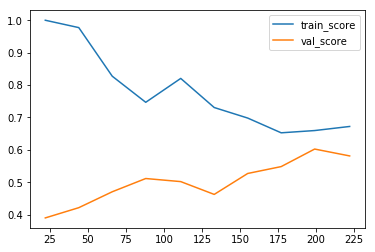

In [90]:
evaluation(grid.best_estimator_)

## Precision Recall curve

In [99]:
from sklearn.metrics import precision_recall_curve

In [103]:
precision, recall, treshold = precision_recall_curve(Y_test, grid.best_estimator_.decision_function(X_test))

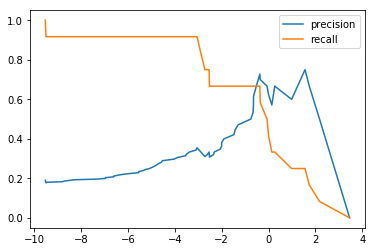

In [107]:
plt.plot(treshold, precision[:-1], label = 'precision')
plt.plot(treshold, recall[:-1], label = 'recall')
plt.legend()

In [112]:
def model_final(model, X, threshold = 0):
    return model.decision_function(X) > threshold

In [113]:
y_pred = model_final(grid.best_estimator_, X_test,  -1)

In [116]:
f1_score(Y_test, y_pred)

0.5714285714285715

In [117]:
from sklearn.metrics import recall_score


recall_score(Y_test, y_pred)

0.6666666666666666

In [118]:
# On a testé différents types d'algo, Bagging, Boosting, SVM (eficace sur petit dataset), test avecune procédure robuste
# pipeline etc.
# Dans le cadre d'une classification binaire, on affiche la courbe de precision et de recall
# pour definir un seuil de décision pour une perosnne malade